<a href="https://colab.research.google.com/github/molotovsingh/molotovsingh/blob/main/Seasonality_and_Detrending_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed


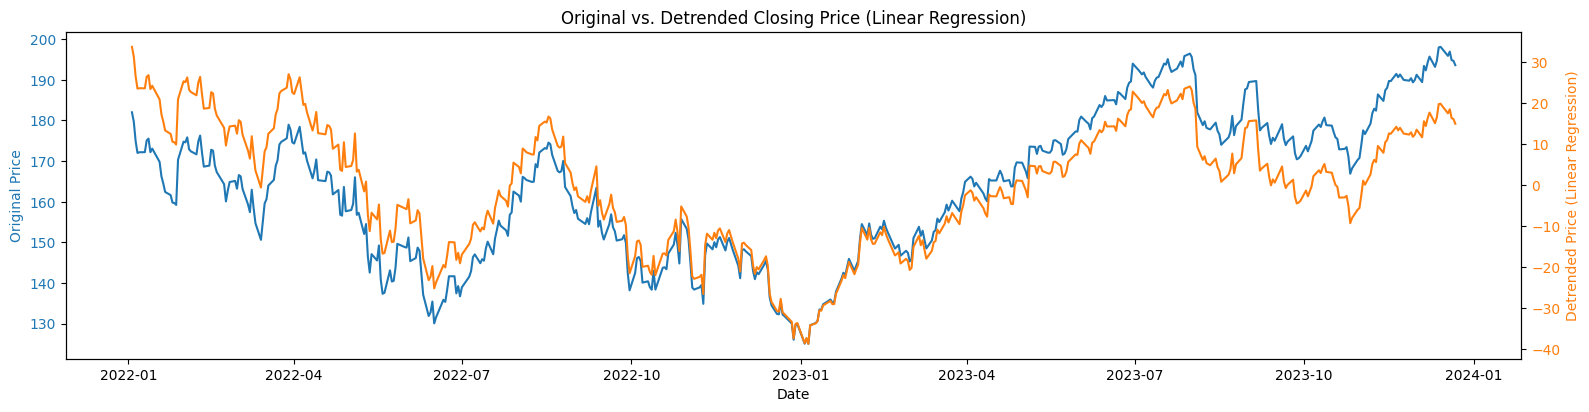

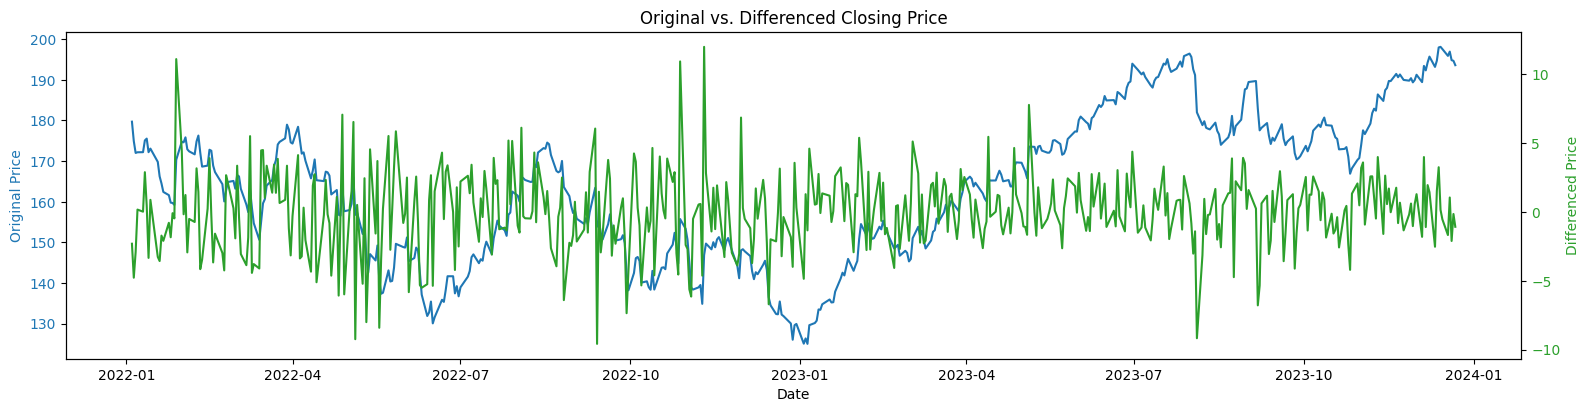

In [ ]:
#2methods
#stage:beta
# Install Required Packages
#!pip install yfinance pandas statsmodels matplotlib

# Import Libraries
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fetch Financial Data
ticker = 'AAPL'
data = yf.download(ticker, start='2022-01-01', end='2023-12-25')
price = data['Close']  # We'll focus on the closing price

# Detrending using Simple Linear Regression
X = sm.add_constant(range(len(price)))
model = sm.OLS(price.values, X).fit()
trend = model.predict(X)
price_detrended_linear = price - trend

# Detrending using Differencing
price_detrended_diff = price.diff().dropna()

# Plotting

# Plot for Linear Regression Detrending
fig, ax1 = plt.subplots(figsize=(16, 4))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Original Price', color=color)
ax1.plot(price.index, price, label='Original Data', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Detrended Price (Linear Regression)', color=color)
ax2.plot(price.index, price_detrended_linear, label='Detrended Data (Linear Regression)', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Original vs. Detrended Closing Price (Linear Regression)')
plt.show()

# Plot for Differencing Detrending
fig, ax1 = plt.subplots(figsize=(16, 4))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Original Price', color=color)
ax1.plot(price.index[1:], price[1:], label='Original Data', color=color)  # Skip the first NaN value
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Differenced Price', color=color)
ax2.plot(price_detrended_diff.index, price_detrended_diff, label='Differenced Data', color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Original vs. Differenced Closing Price')
plt.show()


[*********************100%%**********************]  1 of 1 completed


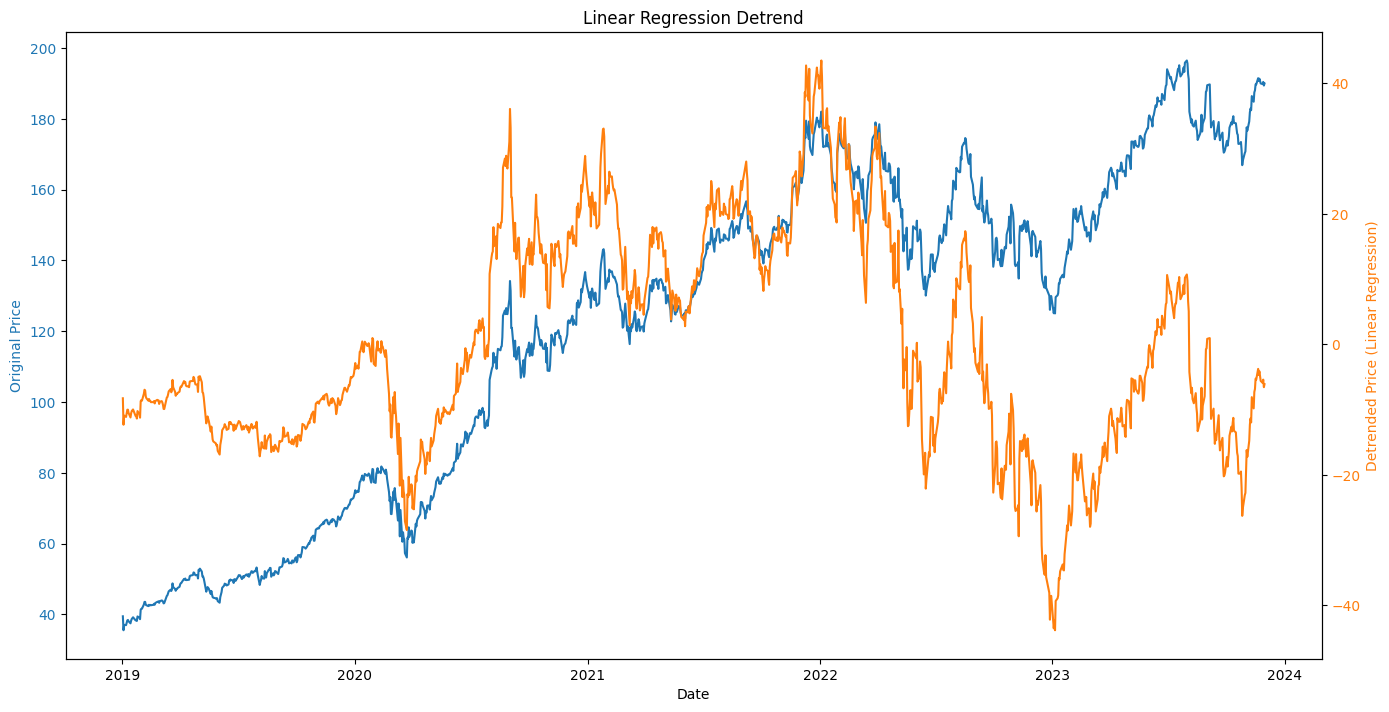

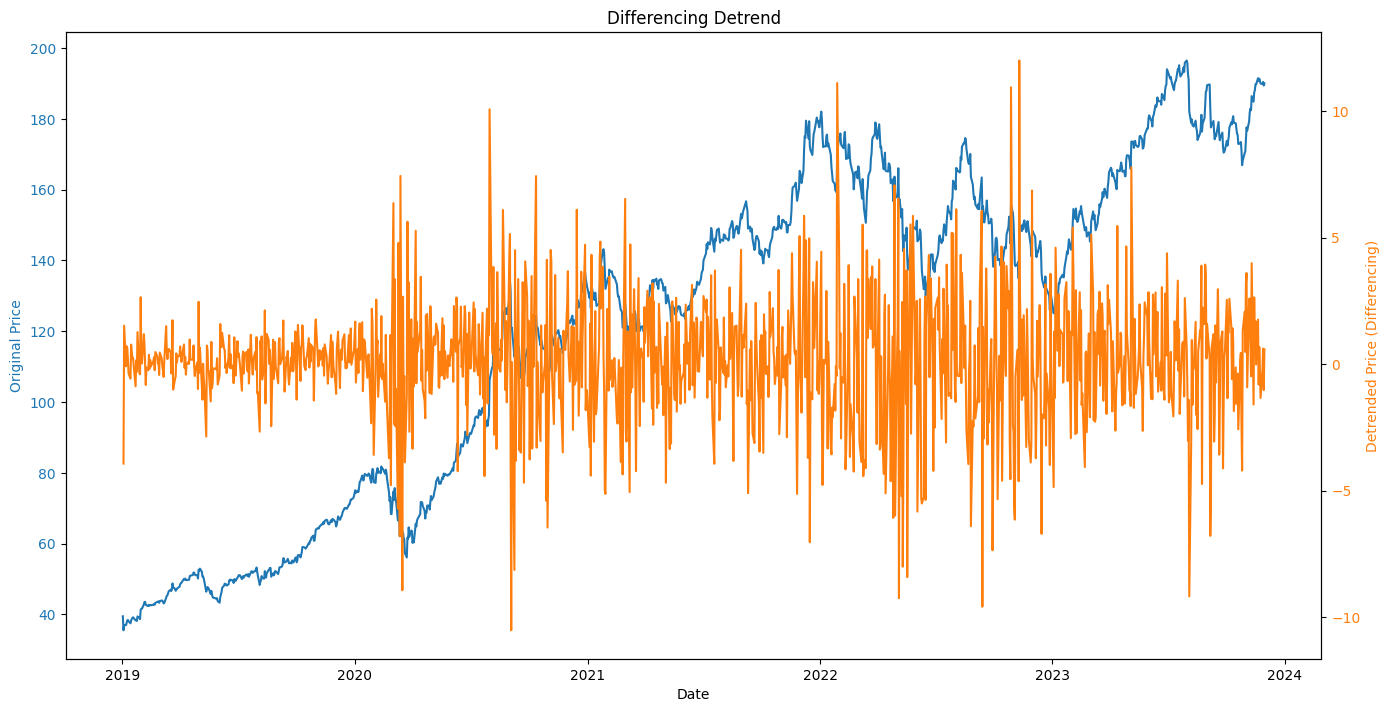

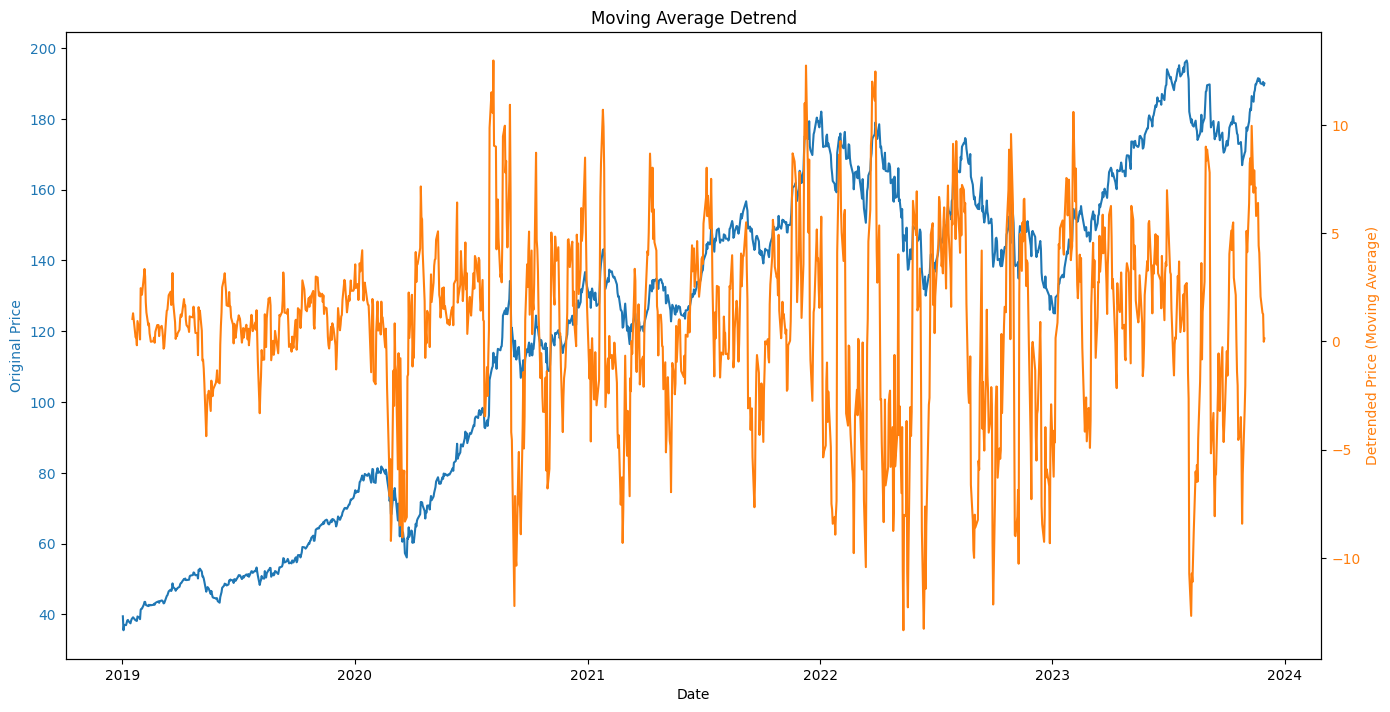

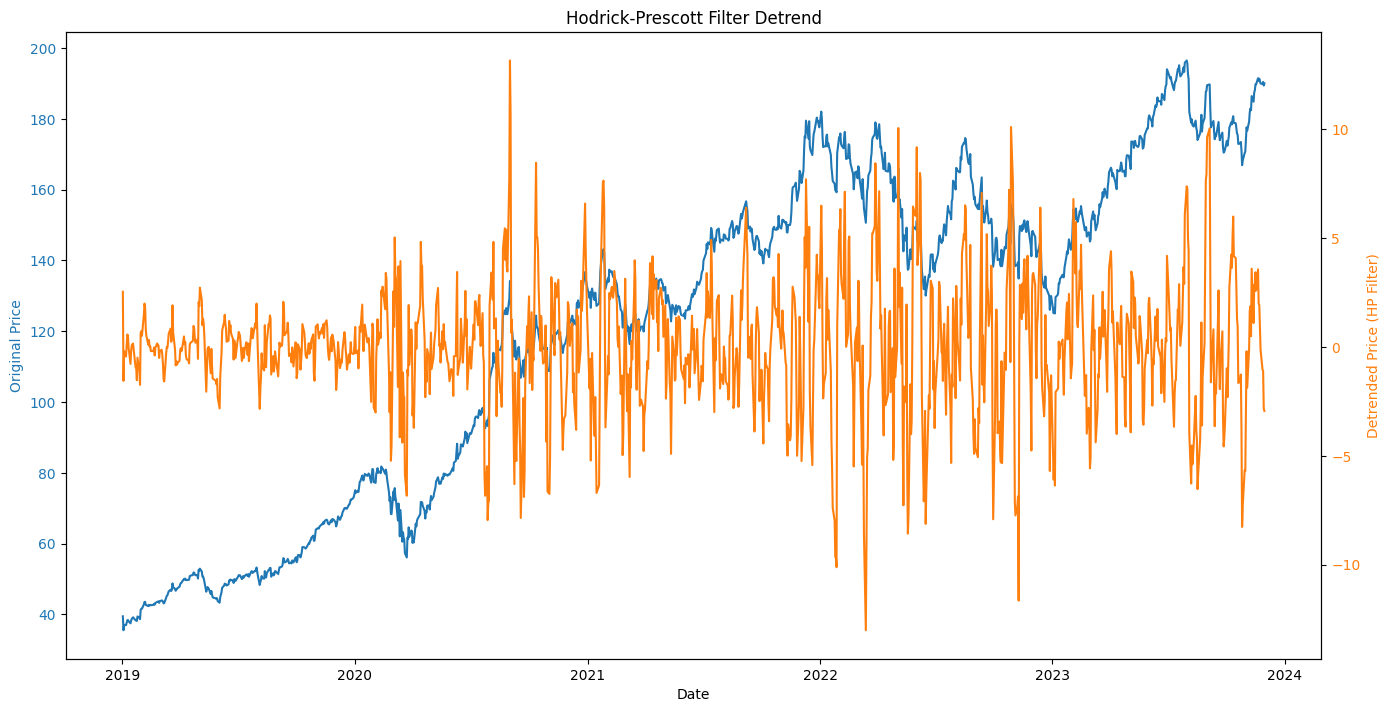

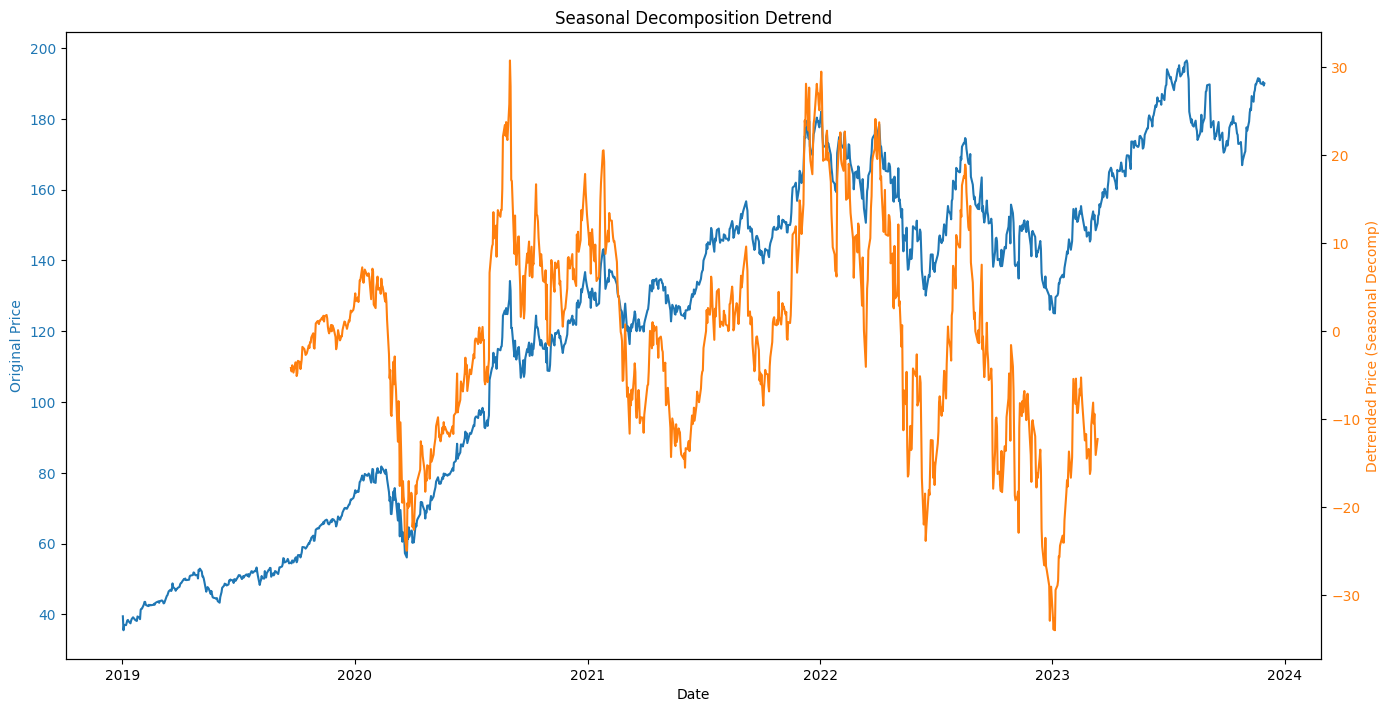

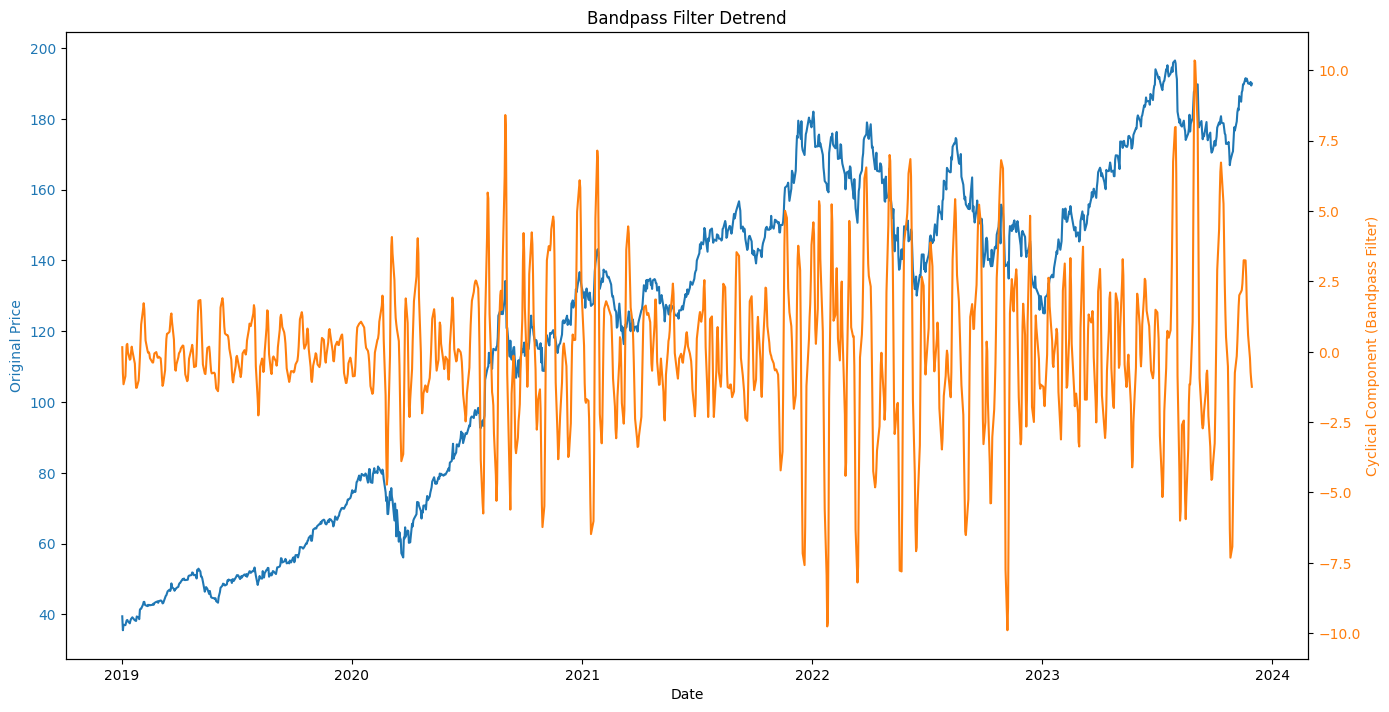

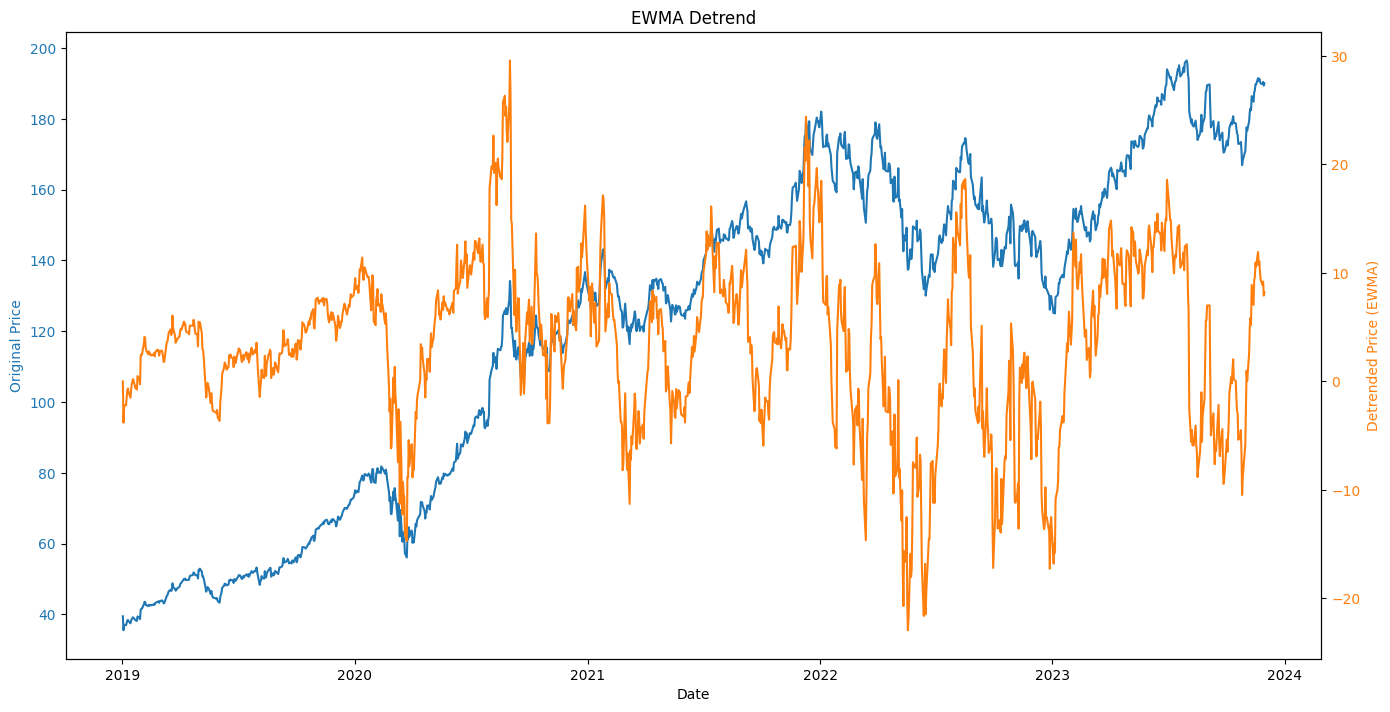

In [ ]:
# Install Required Packages
#!pip install yfinance pandas statsmodels matplotlib

# Import Libraries
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

# Fetch Financial Data
ticker = 'AAPL'
data = yf.download(ticker, start='2019-01-01', end='2023-12-01')
price = data['Close']  # We'll focus on the closing price

# Function to plot the original and detrended data
def plot_detrended_price(original, detrended, title, ylabel):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Original Price', color=color)
    ax1.plot(original.index, original, label='Original Data', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel(ylabel, color=color)
    ax2.plot(detrended.index, detrended, label='Detrended Data', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()
    plt.title(title)
    plt.show()

# Detrending using Simple Linear Regression
def linear_regression_detrend(series):
    X = sm.add_constant(range(len(series)))
    model = sm.OLS(series.values, X).fit()
    trend = model.predict(X)
    return series - trend

price_detrended_linear = linear_regression_detrend(price)
plot_detrended_price(price, price_detrended_linear, 'Linear Regression Detrend', 'Detrended Price (Linear Regression)')

# Detrending using Differencing
price_detrended_diff = price.diff().dropna()
plot_detrended_price(price, price_detrended_diff, 'Differencing Detrend', 'Detrended Price (Differencing)')

# Detrending using Moving Average
window_size = 12  # Monthly moving average; adjust as needed
rolling_mean = price.rolling(window=window_size).mean()
price_detrended_ma = price - rolling_mean

plot_detrended_price(price, price_detrended_ma, 'Moving Average Detrend', 'Detrended Price (Moving Average)')

# Detrending using Hodrick-Prescott Filter
cycle, trend = hpfilter(price, lamb=1600)  # lambda value for quarterly data; adjust as needed
price_detrended_hp = price - trend

plot_detrended_price(price, price_detrended_hp, 'Hodrick-Prescott Filter Detrend', 'Detrended Price (HP Filter)')

# ... Add additional blocks for other detrending methods as needed
from statsmodels.tsa.seasonal import seasonal_decompose

# Detrending using Seasonal Decomposition
def seasonal_decomposition_detrend(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)
    detrended = series - decomposition.trend
    return detrended.dropna(), decomposition.trend.dropna()

# Apply Seasonal Decomposition Detrending
# You need to specify the period (e.g., 365 for daily data with yearly seasonality)
price_detrended_seasonal, trend_seasonal = seasonal_decomposition_detrend(price, 365)
plot_detrended_price(price, price_detrended_seasonal, 'Seasonal Decomposition Detrend', 'Detrended Price (Seasonal Decomp)')

from statsmodels.tsa.filters.cf_filter import cffilter

# Detrending using Bandpass Filter
def bandpass_filter_detrend(series, low, high):
    cycle, trend = cffilter(series, low=low, high=high, drift=True)
    return cycle, trend

# Apply Bandpass Filtering Detrending
# Specify the low and high cycle lengths that you are interested in isolating
price_cyclical_bp, price_trend_bp = bandpass_filter_detrend(price, low=6, high=32)
plot_detrended_price(price, price_cyclical_bp, 'Bandpass Filter Detrend', 'Cyclical Component (Bandpass Filter)')

# Detrending using Exponentially Weighted Moving Average (EWMA)
def ewma_detrend(series, span):
    ewma = series.ewm(span=span, adjust=False).mean()
    detrended = series - ewma
    return detrended, ewma

# Apply EWMA Detrending
# The 'span' parameter defines the amount of smoothing (lower span = more smoothing)
price_detrended_ewma, trend_ewma = ewma_detrend(price, span=60)
plot_detrended_price(price, price_detrended_ewma, 'EWMA Detrend', 'Detrended Price (EWMA)')



[*********************100%%**********************]  1 of 1 completed
            Original Price  LR Detrended  Diff Detrended  MA Detrended  \
Date                                                                     
2022-01-03      182.009995     38.593769        4.439987     22.206827   
2022-01-04      179.699997     36.164185       -2.309998     19.283496   
2022-01-05      174.919998     31.264599       -4.779999     13.968331   
2022-01-06      172.000000     28.225014       -2.919998     10.540166   
2022-01-07      172.169998     28.275426        0.169998     10.189164   
...                    ...           ...             ...           ...   
2022-04-05      175.059998     23.990228       -3.380005      7.174164   
2022-04-06      171.830002     20.640646       -3.229996      3.950168   
2022-04-07      172.139999     20.831057        0.309998      4.309165   
2022-04-08      170.089996     18.661467       -2.050003      2.349829   
2022-04-11      165.750000     14.201884   

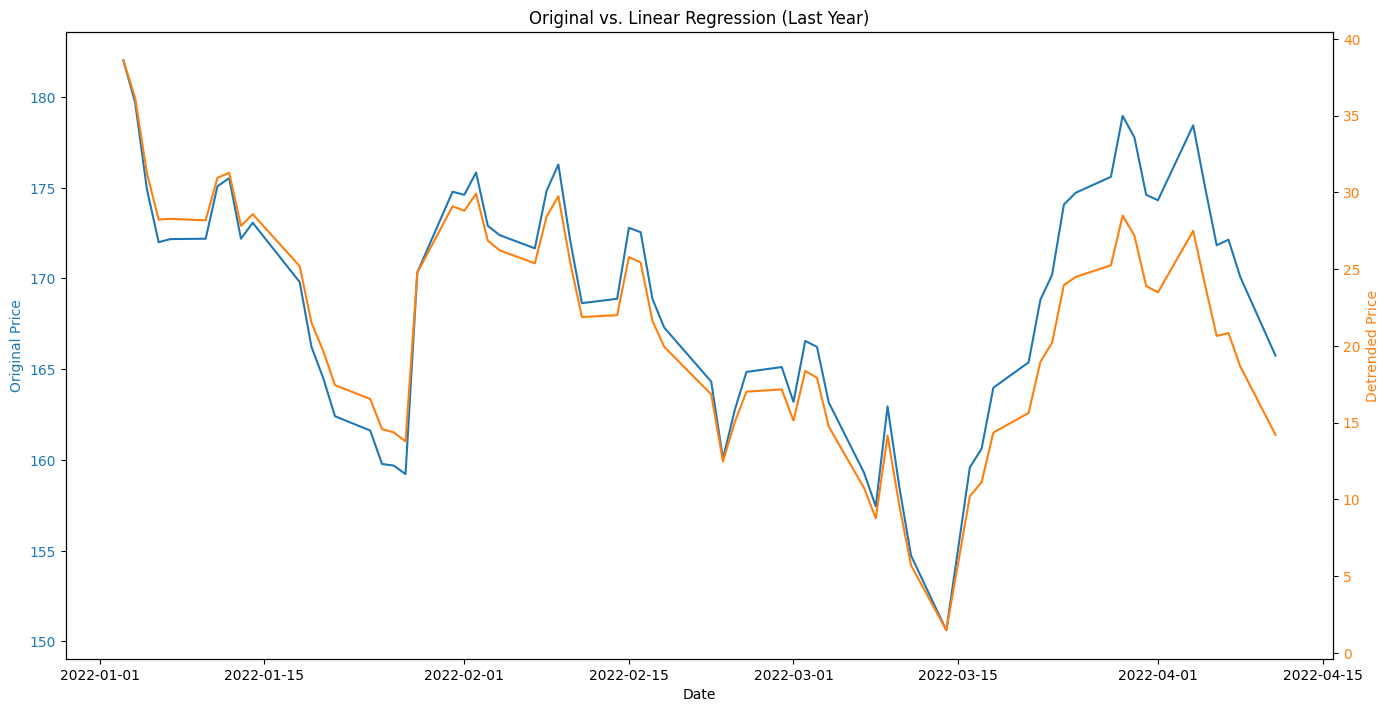

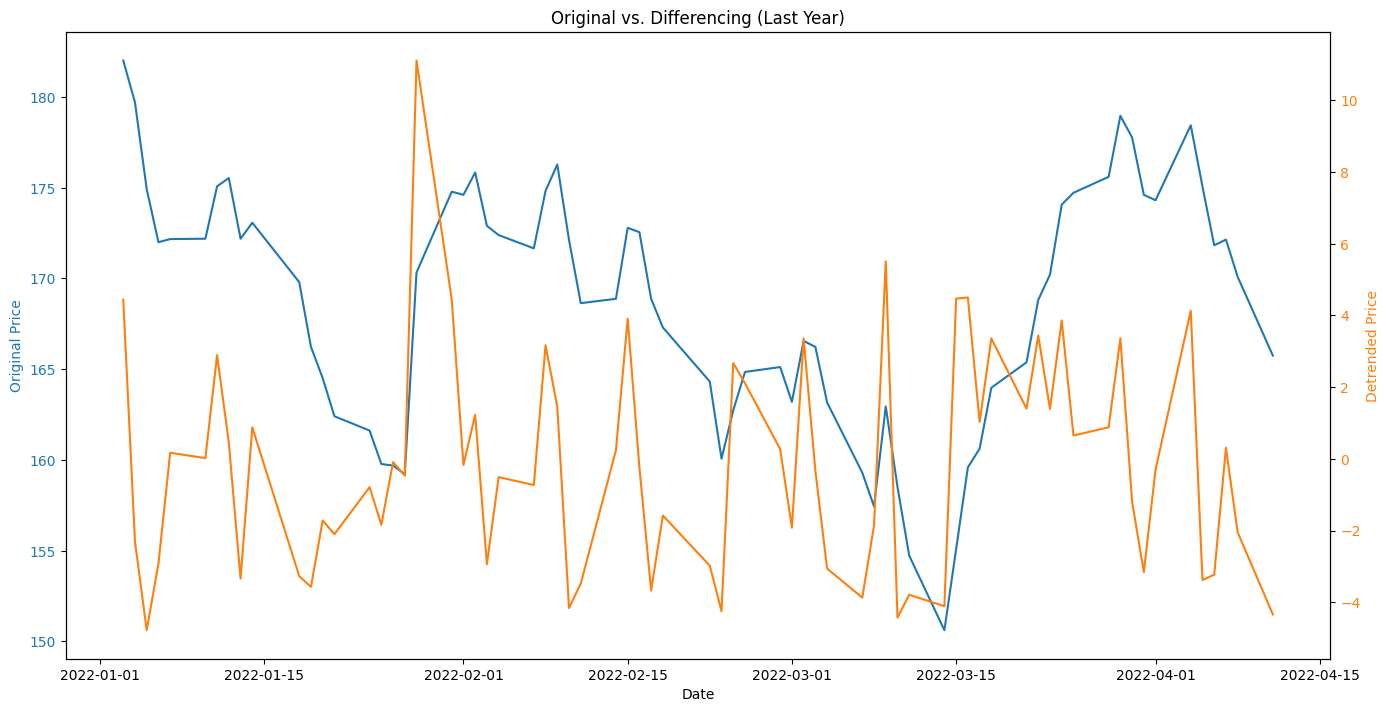

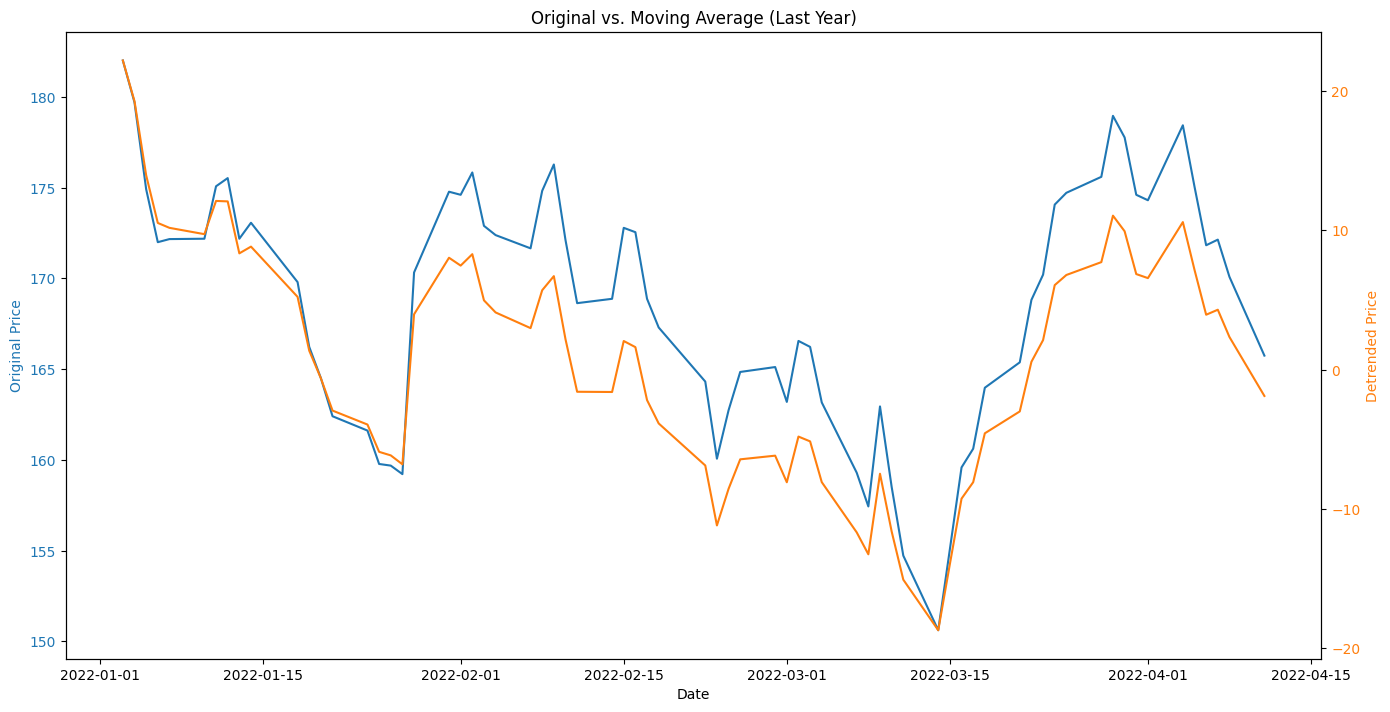

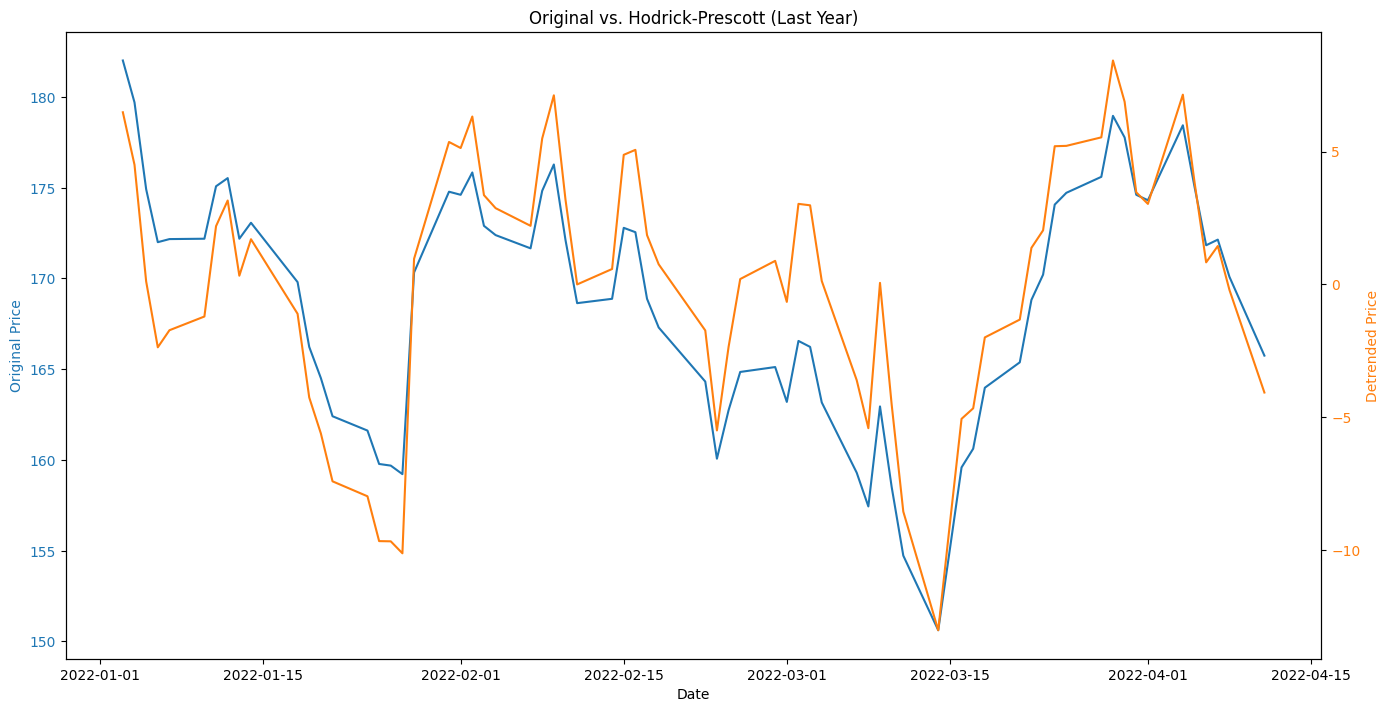

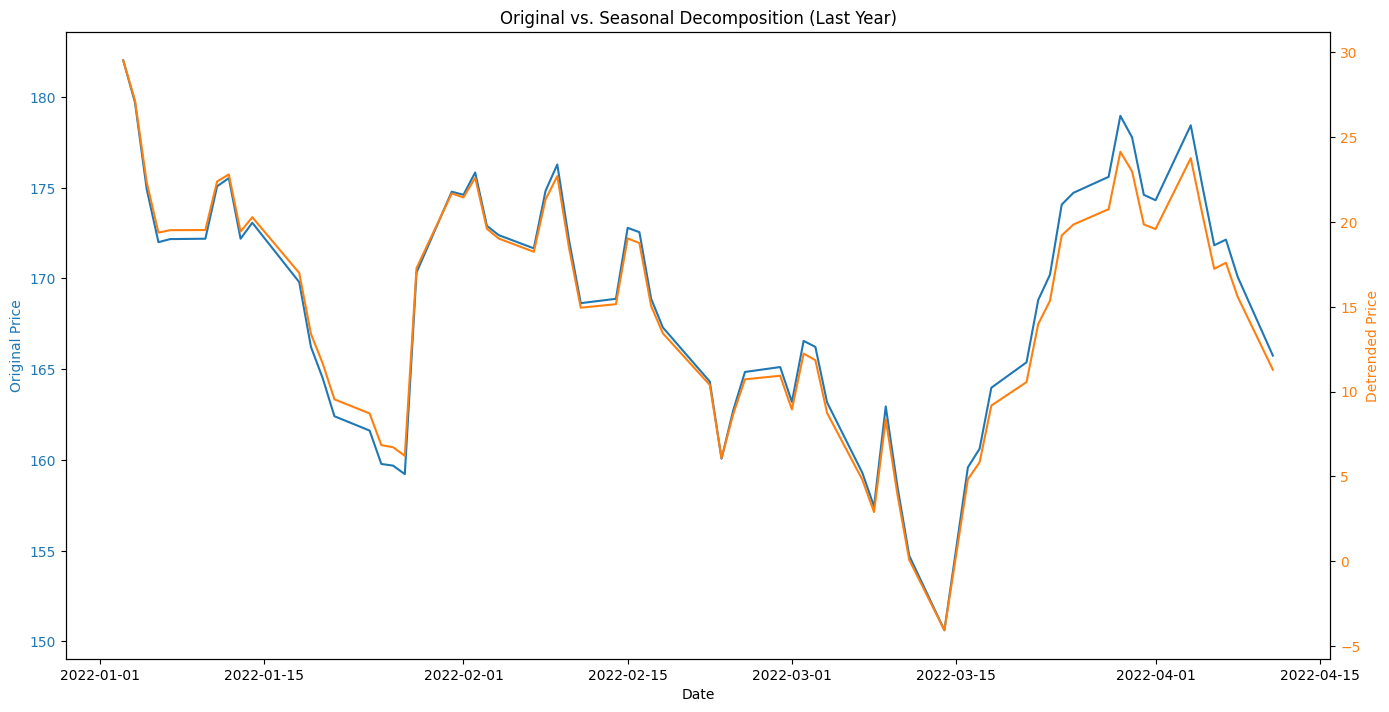

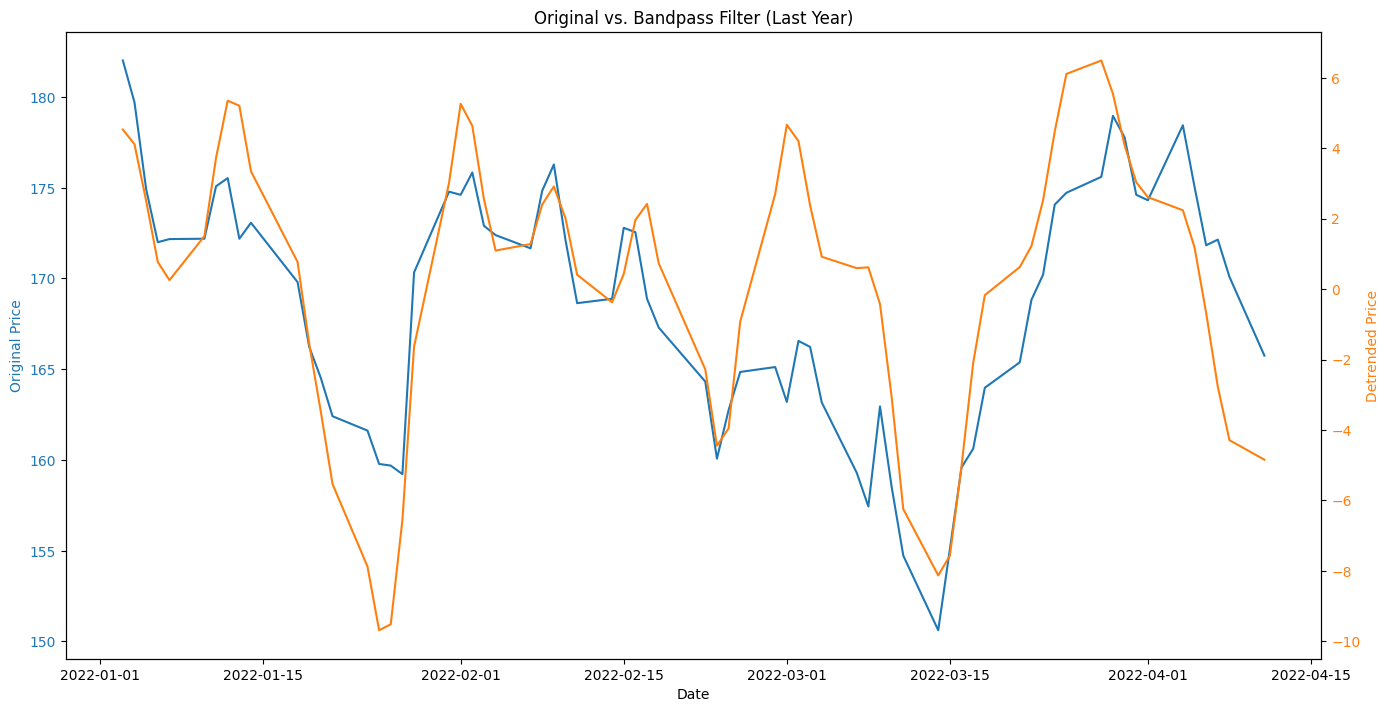

In [ ]:
## dataframes which tabulates raw vs detrended for the past year
# Install Required Packages
#!pip install yfinance pandas statsmodels matplotlib

# Import Libraries
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.cf_filter import cffilter
import matplotlib.pyplot as plt

# Fetch 5 Years of Raw Data
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-01-01')
price = data['Close']  # Focus on the closing price

# Detrending Methods
# 1. Simple Linear Regression
def linear_regression_detrend(series):
    X = sm.add_constant(range(len(series)))
    model = sm.OLS(series.values, X).fit()
    trend = model.predict(X)
    return series - trend

# 2. Differencing
def differencing_detrend(series):
    return series.diff().dropna()

# 3. Moving Average
def moving_average_detrend(series, window_size):
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean

# 4. Hodrick-Prescott Filter
def hp_filter_detrend(series, lamb=1600):
    cycle, trend = hpfilter(series, lamb=lamb)
    return cycle

# 5. Seasonal Decomposition
def seasonal_decomposition_detrend(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)
    return series - decomposition.trend

# 6. Bandpass Filter
def bandpass_filter_detrend(series, low, high):
    cycle, trend = cffilter(series, low=low, high=high, drift=True)
    return cycle

# Applying Detrending Methods
price_detrended_linear = linear_regression_detrend(price)
price_detrended_diff = differencing_detrend(price)
price_detrended_ma = moving_average_detrend(price, 60)  # Example window size
price_detrended_hp = hp_filter_detrend(price)
price_detrended_seasonal = seasonal_decomposition_detrend(price, 365)
price_detrended_bp = bandpass_filter_detrend(price, 6, 32)

# Create a DataFrame with the original price and detrended series
df_full = pd.DataFrame({
    'Original Price': price,
    'LR Detrended': price_detrended_linear,
    'Diff Detrended': price_detrended_diff,
    'MA Detrended': price_detrended_ma,
    'HP Detrended': price_detrended_hp,
    'SD Detrended': price_detrended_seasonal,
    'BP Cyclical': price_detrended_bp
})

# Drop any rows with NaN values
df_full.dropna(inplace=True)

# Slice the DataFrame to the Last Year for Display
df_last_year = df_full.last('1Y')

# Display the DataFrame for the last year
print(df_last_year)

# ... (previous code remains the same)

# Function to plot the original and detrended data
def plot_detrended_price(original, detrended, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Original Price', color=color)
    ax1.plot(original.index, original, label='Original Data', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    color = 'tab:orange'
    ax2.set_ylabel('Detrended Price', color=color)
    ax2.plot(detrended.index, detrended, label='Detrended Data', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # To make sure that the labels do not overlap
    plt.title(title)
    plt.show()

# Visualize the original vs. detrended data for the last year
methods = {
    'LR Detrended': 'Linear Regression',
    'Diff Detrended': 'Differencing',
    'MA Detrended': 'Moving Average',
    'HP Detrended': 'Hodrick-Prescott',
    'SD Detrended': 'Seasonal Decomposition',
    'BP Cyclical': 'Bandpass Filter'
}

for method, name in methods.items():
    plot_detrended_price(df_last_year['Original Price'], df_last_year[method], f'Original vs. {name} (Last Year)')




[*********************100%%**********************]  1 of 1 completed


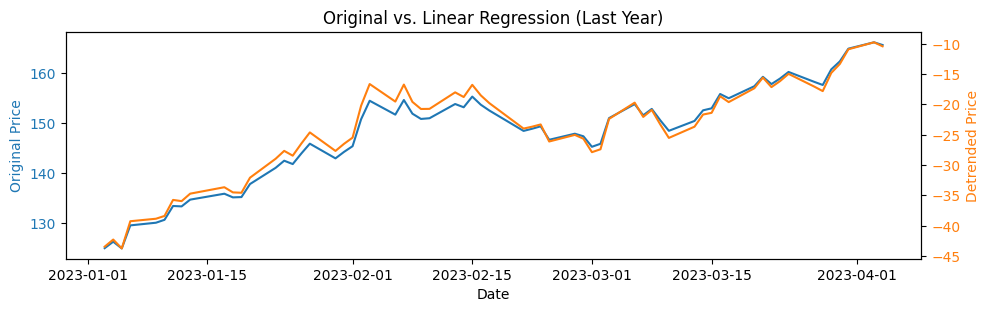

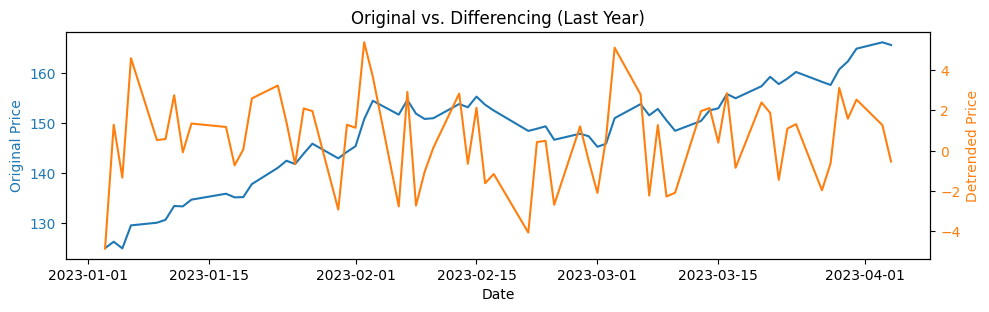

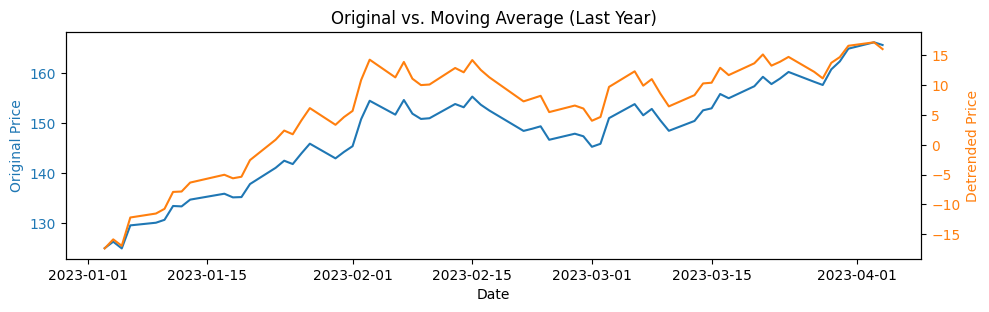

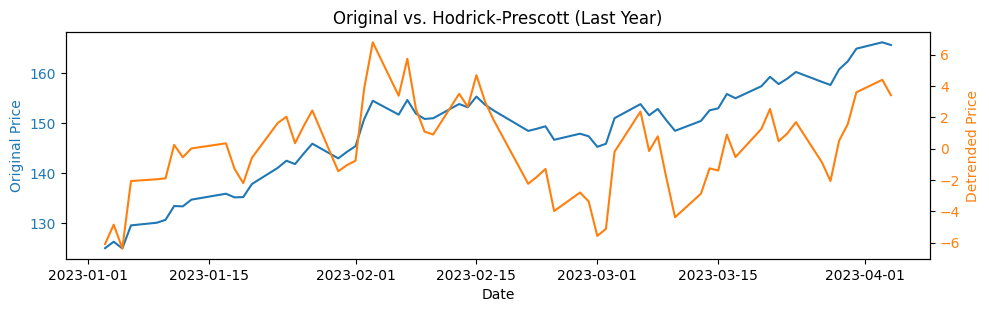

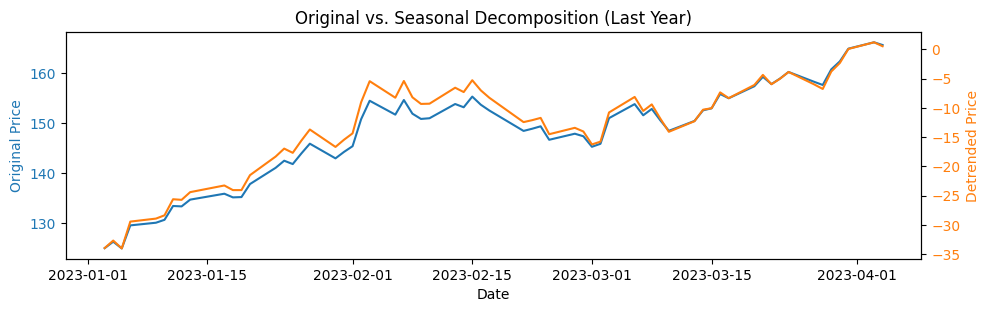

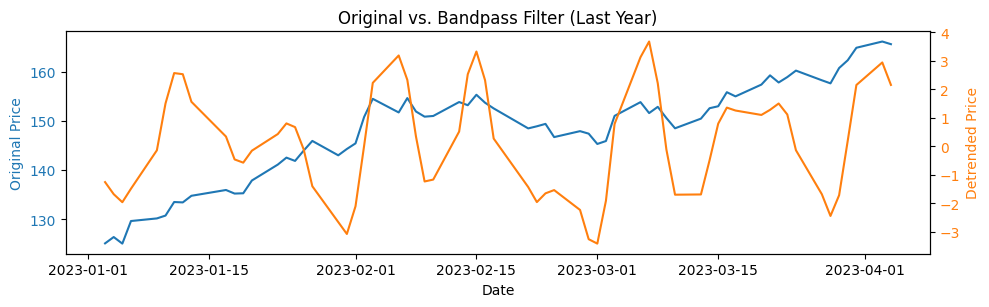

In [ ]:
# Install Required Packages
#!pip install yfinance pandas statsmodels matplotlib

# Import Libraries
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.cf_filter import cffilter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Calculate the date 5 years ago from today
five_years_ago = datetime.now() - timedelta(days=5*365)

# Fetch 5 Years of Raw Data leading up to today
ticker = 'AAPL'
data = yf.download(ticker, start=five_years_ago.strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))
price = data['Close']  # Focus on the closing price

# Detrending Methods
# Simple Linear Regression
def linear_regression_detrend(series):
    X = sm.add_constant(range(len(series)))
    model = sm.OLS(series.values, X).fit()
    trend = model.predict(X)
    return series - trend

# Differencing
def differencing_detrend(series):
    return series.diff().dropna()

# Moving Average
def moving_average_detrend(series, window_size):
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean

# Hodrick-Prescott Filter
def hp_filter_detrend(series, lamb=1600):
    cycle, trend = hpfilter(series, lamb=lamb)
    return cycle

# Seasonal Decomposition
def seasonal_decomposition_detrend(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)
    return series - decomposition.trend

# Bandpass Filter
def bandpass_filter_detrend(series, low, high):
    cycle, trend = cffilter(series, low=low, high=high, drift=True)
    return cycle

# Applying Detrending Methods
price_detrended_linear = linear_regression_detrend(price)
price_detrended_diff = differencing_detrend(price)
price_detrended_ma = moving_average_detrend(price, 60)  # Example window size
price_detrended_hp = hp_filter_detrend(price)
price_detrended_seasonal = seasonal_decomposition_detrend(price, 365)
price_detrended_bp = bandpass_filter_detrend(price, 6, 32)

# Create a DataFrame with the original price and detrended series
df_full = pd.DataFrame({
    'Original Price': price,
    'LR Detrended': price_detrended_linear,
    'Diff Detrended': price_detrended_diff,
    'MA Detrended': price_detrended_ma,
    'HP Detrended': price_detrended_hp,
    'SD Detrended': price_detrended_seasonal,
    'BP Cyclical': price_detrended_bp
})

# Drop any rows with NaN values
df_full.dropna(inplace=True)

# Slice the DataFrame to the Last Year for Display
df_last_year = df_full.last('1Y')

# Function to plot the original and detrended data
def plot_detrended_price(original, detrended, title):
    fig, ax1 = plt.subplots(figsize=(10,3))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Original Price', color=color)
    ax1.plot(original.index, original, label='Original Data', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('Detrended Price', color=color)
    ax2.plot(detrended.index, detrended, label='Detrended Data', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Visualize the original vs. detrended data for the last year
methods = {
    'LR Detrended': 'Linear Regression',
    'Diff Detrended': 'Differencing',
    'MA Detrended': 'Moving Average',
    'HP Detrended': 'Hodrick-Prescott',
    'SD Detrended': 'Seasonal Decomposition',
    'BP Cyclical': 'Bandpass Filter'
}

for method, name in methods.items():
    plot_detrended_price(df_last_year['Original Price'], df_last_year[method], f'Original vs. {name} (Last Year)')

# Export the last year's data to a CSV file
df_last_year.to_csv('detrended_data_last_year.csv')

from datetime import datetime

# Define the date check function
def check_latest_date(dataframe, tolerance_days=7):
    most_recent_date = dataframe.index.max()  # Assuming the index is already in datetime format
    today = datetime.now().date()  # Today's date from Google Colab's server
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        print(f"Warning: The most recent data is {difference.days} days old, which is more than the tolerance of {tolerance_days} days.")
    else:
        print(f"The most recent data is up-to-date within the tolerance of {tolerance_days} days.")

# Assuming 'df' is your DataFrame with the date as the index
# check_latest_date(df)


[*********************100%%**********************]  1 of 1 completed
The most recent data is up-to-date within the tolerance of 7 days.


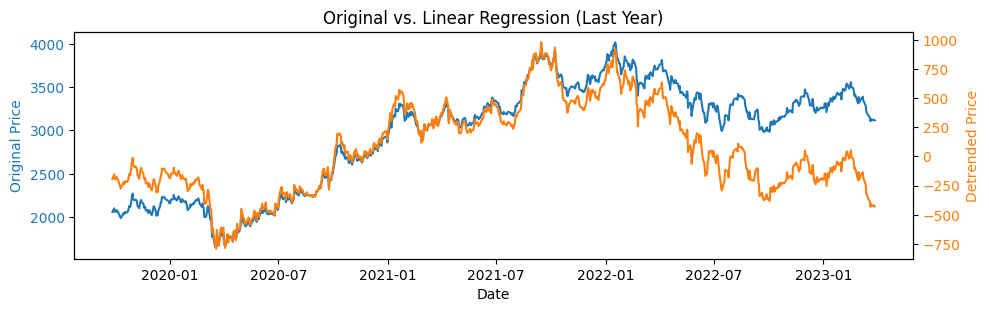

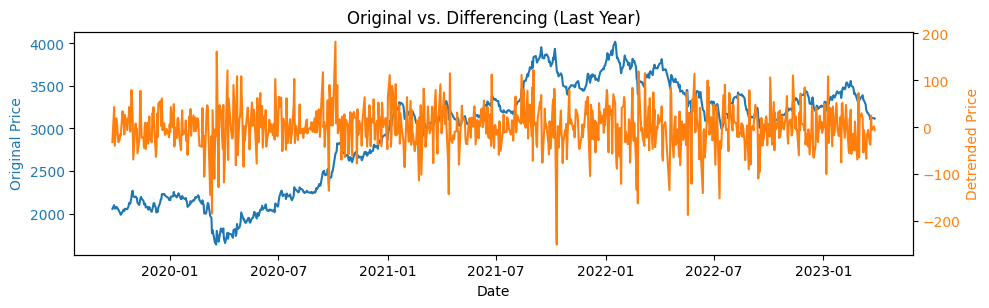

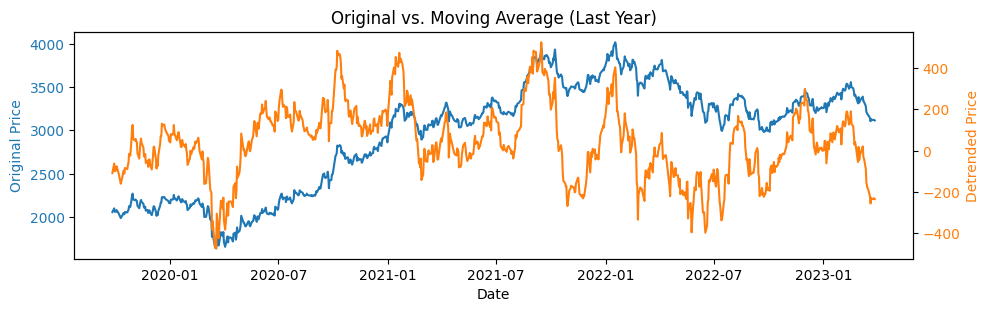

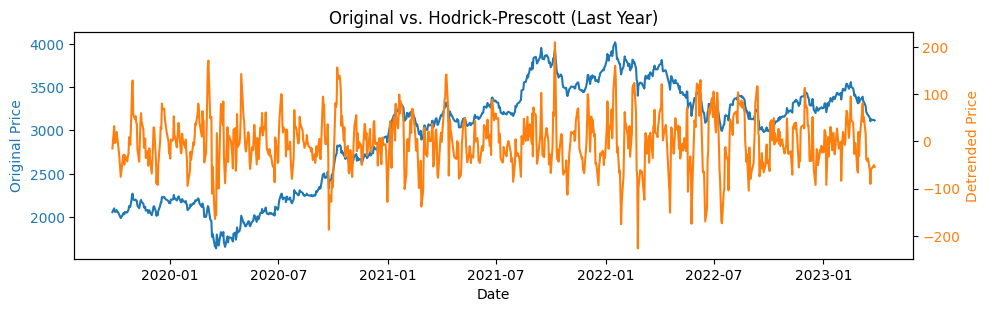

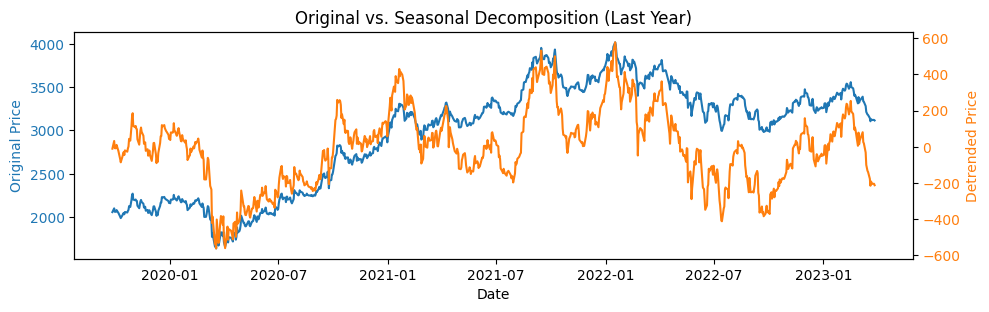

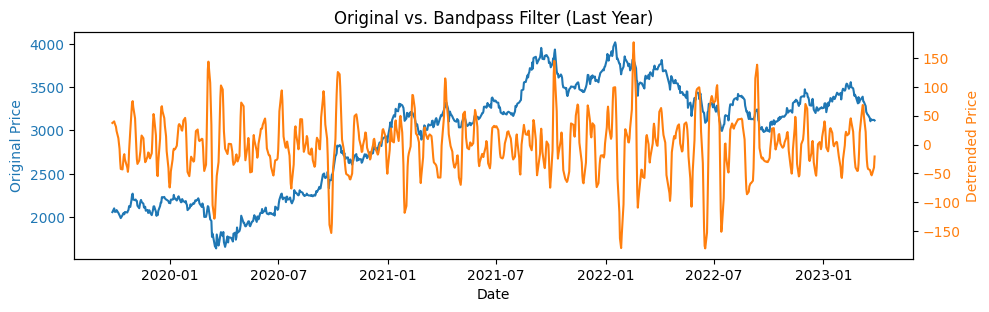

The CSV file has been saved to: /content/detrended_data_last_year.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import Libraries
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.cf_filter import cffilter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Calculate the date 5 years ago from today
five_years_ago = datetime.now() - timedelta(days=5*365)

# Fetch 5 Years of Raw Data leading up to today
ticker = 'TCS.NS'
data = yf.download(ticker, start=five_years_ago.strftime('%Y-%m-%d'), end=datetime.now().strftime('%Y-%m-%d'))
price = data['Close']  # Focus on the closing price

# Define the date check function
def check_latest_date(dataframe, tolerance_days=7):
    most_recent_date = dataframe.index.max().date()  # Convert Timestamp to date
    today = datetime.now().date()  # Today's date from Google Colab's server
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        raise ValueError(f"Warning: The most recent data is {difference.days} days old, which is more than the tolerance of {tolerance_days} days.")
    else:
        print(f"The most recent data is up-to-date within the tolerance of {tolerance_days} days.")


# Call the date check function
check_latest_date(data)

#Detrending Methods
# Simple Linear Regression
def linear_regression_detrend(series):
    X = sm.add_constant(range(len(series)))
    model = sm.OLS(series.values, X).fit()
    trend = model.predict(X)
    return series - trend

# Differencing
def differencing_detrend(series):
    return series.diff().dropna()

# Moving Average
def moving_average_detrend(series, window_size):
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean

# Hodrick-Prescott Filter
def hp_filter_detrend(series, lamb=1600):
    cycle, trend = hpfilter(series, lamb=lamb)
    return cycle

# Seasonal Decomposition
def seasonal_decomposition_detrend(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)
    return series - decomposition.trend

# Bandpass Filter
def bandpass_filter_detrend(series, low, high):
    cycle, trend = cffilter(series, low=low, high=high, drift=True)
    return cycle

# Applying Detrending Methods
price_detrended_linear = linear_regression_detrend(price)
price_detrended_diff = differencing_detrend(price)
price_detrended_ma = moving_average_detrend(price, 60)  # Example window size
price_detrended_hp = hp_filter_detrend(price)
price_detrended_seasonal = seasonal_decomposition_detrend(price, 365)
price_detrended_bp = bandpass_filter_detrend(price, 6, 32)

# Create a DataFrame with the original price and detrended series
df_full = pd.DataFrame({
    'Original Price': price,
    'LR Detrended': price_detrended_linear,
    'Diff Detrended': price_detrended_diff,
    'MA Detrended': price_detrended_ma,
    'HP Detrended': price_detrended_hp,
    'SD Detrended': price_detrended_seasonal,
    'BP Cyclical': price_detrended_bp
})

# Drop any rows with NaN values
df_full.dropna(inplace=True)

# Slice the DataFrame to the Last Year for Display
df_last_year = df_full.last('5Y')

# Function to plot the original and detrended data
def plot_detrended_price(original, detrended, title):
    fig, ax1 = plt.subplots(figsize=(10,3))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Original Price', color=color)
    ax1.plot(original.index, original, label='Original Data', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('Detrended Price', color=color)
    ax2.plot(detrended.index, detrended, label='Detrended Data', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Visualize the original vs. detrended data for the last year
methods = {
    'LR Detrended': 'Linear Regression',
    'Diff Detrended': 'Differencing',
    'MA Detrended': 'Moving Average',
    'HP Detrended': 'Hodrick-Prescott',
    'SD Detrended': 'Seasonal Decomposition',
    'BP Cyclical': 'Bandpass Filter'
}

for method, name in methods.items():
    plot_detrended_price(df_last_year['Original Price'], df_last_year[method], f'Original vs. {name} (Last Year)')

# Export the last year's data to a CSV file
df_last_year.to_csv('detrended_data_last_year.csv')

# ... (previous code for fetching data and detrending)

# Save the DataFrame to a CSV file
csv_file_path = '/content/detrended_data_last_year.csv'
df_last_year.to_csv(csv_file_path)

# Provide a link to download the CSV file
print(f"The CSV file has been saved to: {csv_file_path}")
# To provide a download link in the notebook
from google.colab import files
files.download(csv_file_path)

In [ ]:
import yfinance as yf
import datetime
import os

# Define the ticker symbol
tickerSymbol = 'AAPL'  # Replace with any valid ticker

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Calculate the date 5 years ago from today
five_years_ago = datetime.datetime.now() - datetime.timedelta(days=5*365)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start=five_years_ago, end=datetime.datetime.now())

# Select only the 'Close' column
close_data = tickerDf['Close']

# Save the close data to a CSV file
csv_file = f'{tickerSymbol}_close_data.csv'
close_data.to_csv(csv_file)

# Provide a link to download the CSV file
from google.colab import files
files.download(csv_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The most recent data is up-to-date within the tolerance of 7 days.
The most recent data is up-to-date within the tolerance of 7 days.
The most recent data is up-to-date within the tolerance of 7 days.


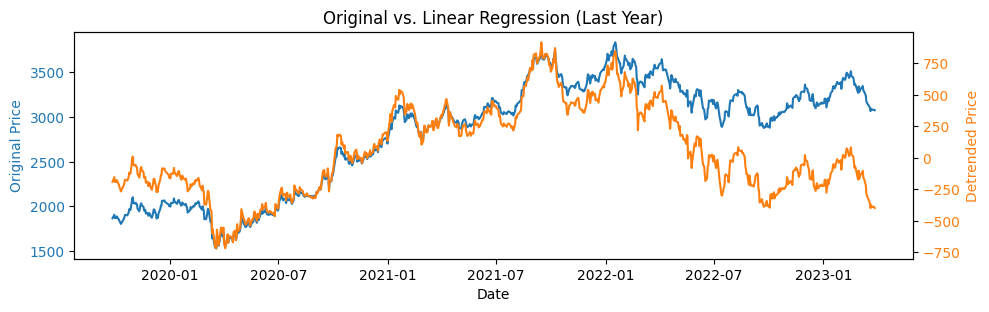

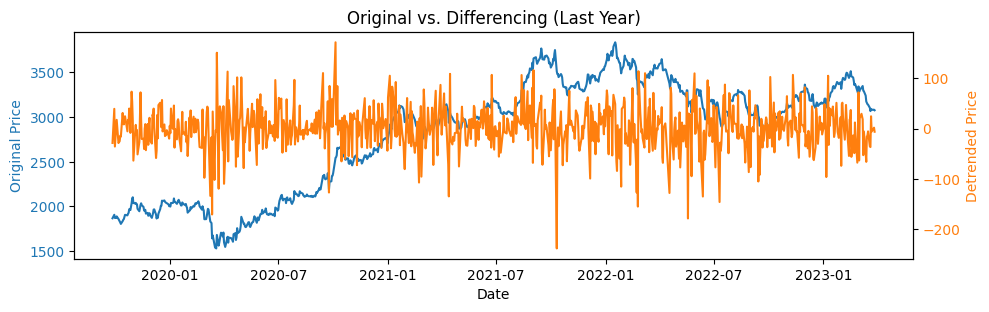

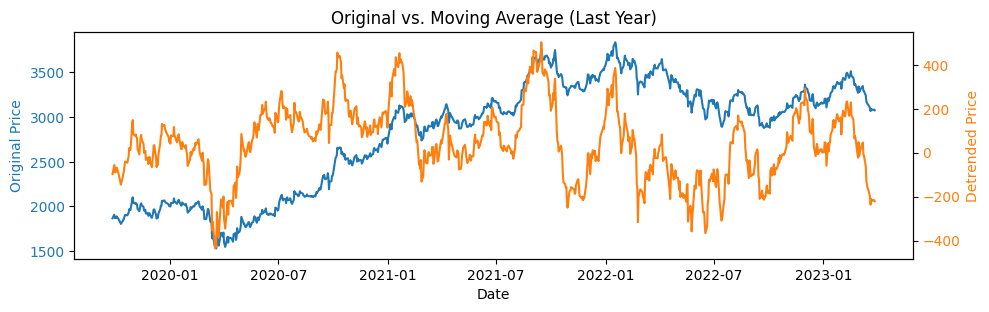

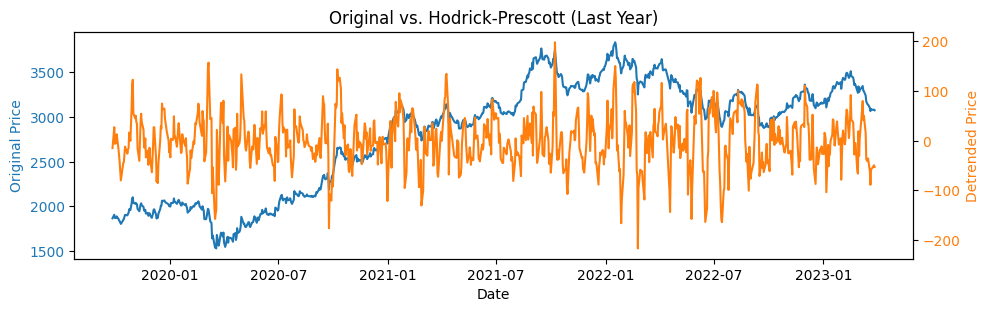

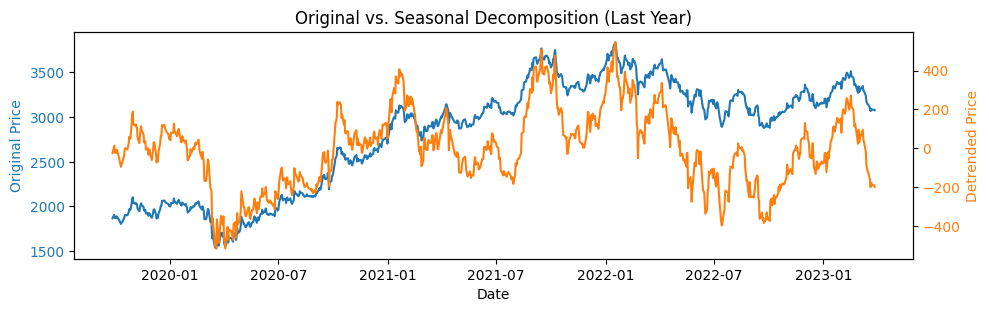

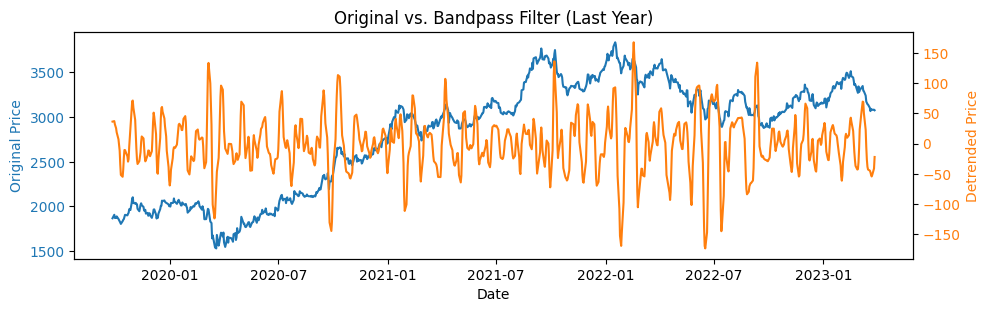

The CSV file has been saved to: /content/detrended_data_last_year.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import Libraries
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.cf_filter import cffilter
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


import yfinance as yf
import pandas as pd
import datetime

# ... (Other imports remain the same)

def fetch_close_data(ticker_symbol):
    five_years_ago = datetime.datetime.now() - datetime.timedelta(days=5*365)
    tickerData = yf.Ticker(ticker_symbol)
    tickerDf = tickerData.history(period='1d', start=five_years_ago, end=datetime.datetime.now())
    close_data = tickerDf['Close']

    # Check if the latest data point is within an acceptable range
    check_latest_date(close_data)

    return close_data

def fetch_close_data(ticker_symbol):
    # Use datetime.datetime.now() instead of datetime.now()
    five_years_ago = datetime.datetime.now() - datetime.timedelta(days=5*365)
    tickerData = yf.Ticker(ticker_symbol)
    tickerDf = tickerData.history(period='1d', start=five_years_ago, end=datetime.datetime.now())
    close_data = tickerDf['Close']

    # Check if the latest data point is within an acceptable range
    check_latest_date(close_data)

    return close_data

def check_latest_date(series, tolerance_days=7):
    # Use datetime.datetime.now() here as well
    most_recent_date = series.index.max().date()
    today = datetime.datetime.now().date()
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        raise ValueError(f"Error: The most recent data is {difference.days} days old, beyond the tolerance of {tolerance_days} days.")
    else:
        print(f"The most recent data is up-to-date within the tolerance of {tolerance_days} days.")

ticker = 'TCS.NS'
try:
    price = fetch_close_data(ticker)
    # ... (rest of your existing code for detrending and analysis)
except ValueError as e:
    print(e)

# Fetch 5 Years of Close Data for 'TCS.NS'
ticker = 'TCS.NS'
price = fetch_close_data(ticker)  # Focus on the closing price



# Call the date check function
check_latest_date(price)

# ... (rest of your existing code for detrending and analysis)

#Detrending Methods
# Simple Linear Regression
def linear_regression_detrend(series):
    X = sm.add_constant(range(len(series)))
    model = sm.OLS(series.values, X).fit()
    trend = model.predict(X)
    return series - trend

# Differencing
def differencing_detrend(series):
    return series.diff().dropna()

# Moving Average
def moving_average_detrend(series, window_size):
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean

# Hodrick-Prescott Filter
def hp_filter_detrend(series, lamb=1600):
    cycle, trend = hpfilter(series, lamb=lamb)
    return cycle

# Seasonal Decomposition
def seasonal_decomposition_detrend(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)
    return series - decomposition.trend

# Bandpass Filter
def bandpass_filter_detrend(series, low, high):
    cycle, trend = cffilter(series, low=low, high=high, drift=True)
    return cycle

# Applying Detrending Methods
price_detrended_linear = linear_regression_detrend(price)
price_detrended_diff = differencing_detrend(price)
price_detrended_ma = moving_average_detrend(price, 60)  # Example window size
price_detrended_hp = hp_filter_detrend(price)
price_detrended_seasonal = seasonal_decomposition_detrend(price, 365)
price_detrended_bp = bandpass_filter_detrend(price, 6, 32)

# Create a DataFrame with the original price and detrended series
df_full = pd.DataFrame({
    'Original Price': price,
    'LR Detrended': price_detrended_linear,
    'Diff Detrended': price_detrended_diff,
    'MA Detrended': price_detrended_ma,
    'HP Detrended': price_detrended_hp,
    'SD Detrended': price_detrended_seasonal,
    'BP Cyclical': price_detrended_bp
})

# Drop any rows with NaN values
df_full.dropna(inplace=True)

# Slice the DataFrame to the Last Year for Display
df_last_year = df_full.last('5Y')

# Function to plot the original and detrended data
def plot_detrended_price(original, detrended, title):
    fig, ax1 = plt.subplots(figsize=(10,3))
    color = 'tab:blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Original Price', color=color)
    ax1.plot(original.index, original, label='Original Data', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:orange'
    ax2.set_ylabel('Detrended Price', color=color)
    ax2.plot(detrended.index, detrended, label='Detrended Data', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Visualize the original vs. detrended data for the last year
methods = {
    'LR Detrended': 'Linear Regression',
    'Diff Detrended': 'Differencing',
    'MA Detrended': 'Moving Average',
    'HP Detrended': 'Hodrick-Prescott',
    'SD Detrended': 'Seasonal Decomposition',
    'BP Cyclical': 'Bandpass Filter'
}

for method, name in methods.items():
    plot_detrended_price(df_last_year['Original Price'], df_last_year[method], f'Original vs. {name} (Last Year)')

# Export the last year's data to a CSV file
df_last_year.to_csv('detrended_data_last_year.csv')

# ... (previous code for fetching data and detrending)

# Save the DataFrame to a CSV file
csv_file_path = '/content/detrended_data_last_year.csv'
df_last_year.to_csv(csv_file_path)

# Provide a link to download the CSV file
print(f"The CSV file has been saved to: {csv_file_path}")
# To provide a download link in the notebook
from google.colab import files
files.download(csv_file_path)




Enter the ticker symbol (default is '^NSEI'): 
Enter the start date as the number of years back (default is 5 years): 
The most recent data is up-to-date within the tolerance of 7 days.
Data fetched successfully. Proceed with further analysis or operations.


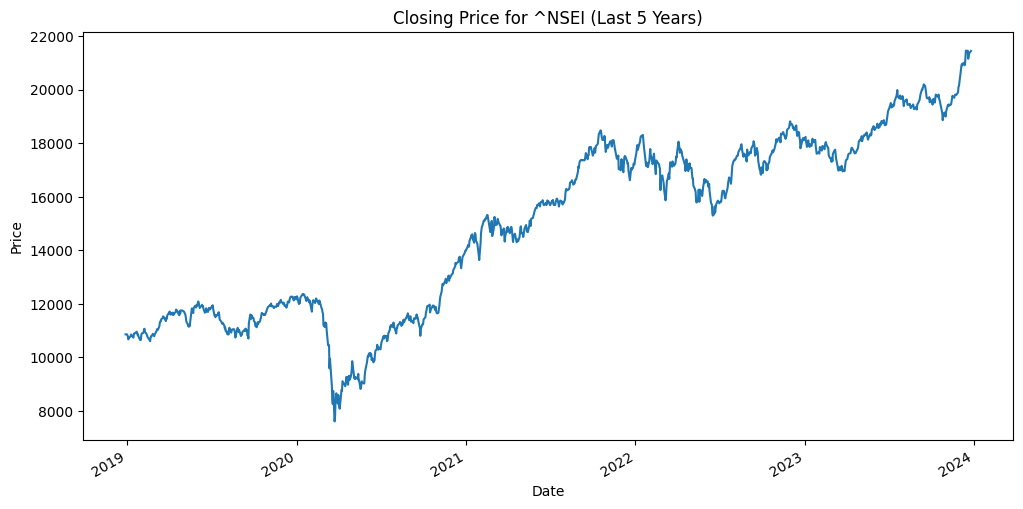

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Function to fetch closing data
def fetch_close_data(ticker_symbol, start_date):
    tickerData = yf.Ticker(ticker_symbol)
    tickerDf = tickerData.history(period='1d', start=start_date, end=datetime.datetime.now())
    close_data = tickerDf['Close']

    # Check if the latest data point is within an acceptable range
    check_latest_date(close_data)

    return close_data

# Function to check if the latest data is within a given tolerance of days
def check_latest_date(series, tolerance_days=7):
    most_recent_date = series.index.max().date()
    today = datetime.datetime.now().date()
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        raise ValueError(f"Error: The most recent data is {difference.days} days old, beyond the tolerance of {tolerance_days} days.")
    else:
        print(f"The most recent data is up-to-date within the tolerance of {tolerance_days} days.")

# Function to perform routine data checks
def perform_data_checks(series):
    # Check for missing data
    if series.isnull().any():
        raise ValueError("Data contains missing values.")

    # Check for obvious outliers, here using a simple z-score method for demonstration
    if ((series - series.mean()).abs() > 3 * series.std()).any():
        raise ValueError("Data contains potential outliers.")

# Function to plot the time series data
def plot_time_series(series, title='Closing Price'):
    plt.figure(figsize=(12, 6))
    series.plot(title=title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Function to calculate start date based on input years
def calculate_start_date(years_back):
    return datetime.datetime.now() - datetime.timedelta(days=365 * years_back)

# Main script
def main():
    # User input for ticker (default is '^NSEI')
    ticker = input("Enter the ticker symbol (default is '^NSEI'): ").strip() or '^NSEI'

    # User input for start date in years (default is 5 years)
    years_back = input("Enter the start date as the number of years back (default is 5 years): ").strip()
    years_back = int(years_back) if years_back.isdigit() else 5

    start_date = calculate_start_date(years_back)

    try:
        # Fetch and check the closing stock data
        price = fetch_close_data(ticker, start_date)
        print("Data fetched successfully. Proceed with further analysis or operations.")

        # Plot the time series data
        plot_time_series(price, title=f'Closing Price for {ticker} (Last {years_back} Years)')
    except ValueError as e:
        print(e)
        # Handle the error or exit the script

if __name__ == '__main__':
    main()




Enter the ticker symbol (default is '^NSEI'): 
Enter the start date as the number of years back (default is 5 years): 10
Data fetched and verified successfully.


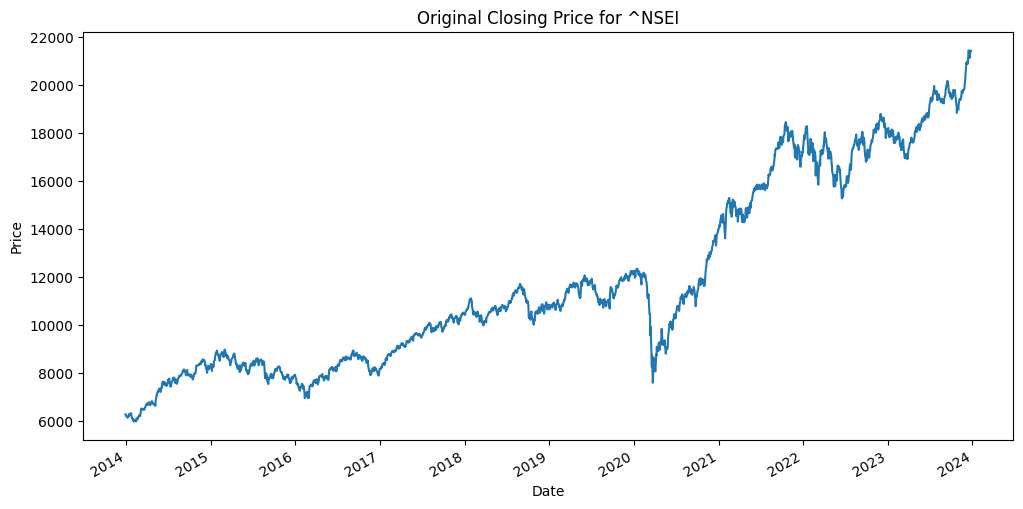

The DataFrame contains missing values.


In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Function to fetch closing data
def fetch_close_data(ticker_symbol, start_date):
    tickerData = yf.Ticker(ticker_symbol)
    tickerDf = tickerData.history(period='1d', start=start_date, end=datetime.datetime.now())
    return tickerDf['Close']

# Function to check if the latest data is within a given tolerance of days
def check_latest_date(series, tolerance_days=7):
    most_recent_date = series.index.max().date()
    today = datetime.datetime.now().date()
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        raise ValueError(f"Error: The most recent data is {difference.days} days old, beyond the tolerance of {tolerance_days} days.")

# Function to perform Linear Regression Detrend
def linear_regression_detrend(series):
    X = sm.add_constant(np.arange(len(series)))
    model = sm.OLS(series, X).fit()
    trend = model.predict(X)
    return series - trend, trend

# Function to perform Moving Average Detrend
def moving_average_detrend(series, window_size=60):
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean, rolling_mean

# Function to plot the time series data
def plot_time_series(series, title='Closing Price', window=None):
    plt.figure(figsize=(12, 6))
    if window:
        series = series.last(window)
    series.plot(title=title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

# Function to handle missing values in the DataFrame
def handle_missing_values(df):
    df.dropna(inplace=True)
    if df.empty:
        raise ValueError("The DataFrame is empty after dropping missing values.")

# Function to calculate start date based on input years
def calculate_start_date(years_back):
    return datetime.datetime.now() - datetime.timedelta(days=365 * years_back)

# Main script
def main():
    # User input for data download
    ticker = input("Enter the ticker symbol (default is '^NSEI'): ").strip() or '^NSEI'
    years_back = input("Enter the start date as the number of years back (default is 5 years): ").strip()
    years_back = int(years_back) if years_back.isdigit() else 5

    try:
        start_date = calculate_start_date(years_back)
        price = fetch_close_data(ticker, start_date)
        check_latest_date(price)
        print("Data fetched and verified successfully.")
    except ValueError as e:
        print(e)
        return  # Stop execution if there's an error in data fetching

    # Visualize the base data
    plot_time_series(price, title=f'Original Closing Price for {ticker}')

    # Apply detrending functions
    lr_detrended, _ = linear_regression_detrend(price)
    ma_detrended, _ = moving_average_detrend(price)

    # Create a DataFrame to hold the detrended data
    detrended_data = pd.DataFrame({
        'Original Price': price,
        'Linear Regression Detrended': lr_detrended,
        'Moving Average Detrended': ma_detrended
    })

    # Perform basic checks on the DataFrame
    try:
        perform_dataframe_checks(detrended_data)
        print("DataFrame checks passed successfully.")
    except ValueError as e:
        print(e)
        return  # Stop execution if there's an error in the checks

    # Ask user for the visualization period
    visualization_days = input("Enter the number of days to visualize detrended data (default is 365): ").strip()
    visualization_days = int(visualization_days) if visualization_days.isdigit() else 365

    # Visualize the detrended data
    plot_time_series(detrended_data['Linear Regression Detrended'], title=f'Linear Regression Detrended for {ticker}', window=f'{visualization_days}D')
    plot_time_series(detrended_data['Moving Average Detrended'], title=f'Moving Average Detrended for {ticker}', window=f'{visualization_days}D')

if __name__ == '__main__':
    main()


In [ ]:
#mistral

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Function to fetch closing data
def fetch_close_data(ticker_symbol: str, start_date: datetime.datetime) -> pd.Series:
    """Fetches the closing price data for a given ticker symbol and start date."""
    ticker_data = yf.Ticker(ticker_symbol)
    ticker_dataframe = ticker_data.history(period='1d', start=start_date, end=datetime.datetime.now())
    return ticker_dataframe['Close']

# Function to check if the latest data is within a given tolerance of days
def check_latest_date(series: pd.Series, tolerance_days: int = 7) -> None:
    """Checks if the latest data is within a given tolerance of days."""
    most_recent_date = series.index.max().date()
    today = datetime.datetime.now().date()
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        raise ValueError(f"Error: The most recent data is {difference.days} days old, beyond the tolerance of {tolerance_days} days.")

# Function to perform Linear Regression Detrend
def linear_regression_detrend(series: pd.Series) -> tuple[pd.Series, pd.Series]:
    """Performs linear regression detrending on a given time series."""
    X = sm.add_constant(np.arange(len(series)))
    model = sm.OLS(series, X).fit()
    trend = model.predict(X)
    return series - trend, trend

# Function to perform Moving Average Detrend
def moving_average_detrend(series: pd.Series, window_size: int = 60) -> tuple[pd.Series, pd.Series]:
    """Performs moving average detrending on a given time series."""
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean, rolling_mean

# Function to plot the time series data
def plot_time_series(series: pd.Series, title: str = 'Closing Price', window: str = None, original_close: pd.Series = None) -> None:
    """Plots the time series data."""
    plt.figure(figsize=(12, 6))
    if window:
        series = series.last(window)
    if original_close is not None:
        plt.plot(original_close.index, original_close, label='Original Close', color='black', alpha=0.5)
    series.plot(label='Detrended', title=title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Function to handle missing values in the DataFrame
def handle_missing_values(df: pd.DataFrame) -> None:
    """Handles missing values in the DataFrame."""
    df.dropna(inplace=True)
    if df.empty:
        raise ValueError("The DataFrame is empty after dropping missing values.")

# Function to calculate start date based on input years
def calculate_start_date(years_back: int) -> datetime.datetime:
    """Calculates the start date based on the input number of years."""
    return datetime.datetime.now() - datetime.timedelta(days=365 * years_back)

# Function to calculate detrending performance metrics
def calculate_detrending_metrics(original: pd.Series, detrended: pd.Series) -> dict:
    """Calculates the detrending performance metrics."""
    rmse = np.sqrt(np.mean((original - detrended) ** 2))
    r_squared = 1 - np.sum((original - detrended) ** 2) / np.sum((original - original.mean()) ** 2)
    return {'RMSE': rmse, 'R-squared': r_squared}

# Function to add performance metrics to the chart
def add_performance_metrics(ax: plt.Axes, metrics: dict) -> None:
    """Adds the performance metrics to the chart."""
    text_str = f"RMSE: {metrics['RMSE']:.2f}\nR-squared: {metrics['R-squared']:.2f}"
    ax.text(0.95, 0.05, text_str, transform=ax.transAxes, fontsize=8, ha='right', va='bottom')

# Main script
def main():
    # User input for data download
    ticker = input("Enter the ticker symbol (default is '^NSEI'): ").strip() or '^NSEI'
    years_back = input("Enter the start date as the number of years back (default is 5 years): ").strip()
    years_back = int(years_back) if years_back.isdigit() else 5

    try:
        start_date = calculate_start_date(years_back)
        price = fetch_close_data(ticker, start_date)
        check_latest_date(price)
        print("Data fetched and verified successfully.")
    except ValueError as e:
        print(e)
        return  # Stop execution if there's an error in data fetching

    # Visualize the base data
    plot_time_series(price, title=f'Original Closing Price for {ticker}')

    # Apply detrending functions
    lr_detrended, _ = linear_regression_detrend(price)
    ma_detrended, _ = moving_average_detrend(price)

    # Create a DataFrame to hold the detrended data
    detrended_data = pd.DataFrame({
        'Original Price': price,
        'Linear Regression Detrended': lr_detrended,
        'Moving Average Detrended': ma_detrended
    })

    # Perform basic checks on the DataFrame
    try:
        handle_missing_values(detrended_data)
        print("DataFrame checks passed successfully.")
    except ValueError as e:
        print(e)
        return  # Stop execution if there's an error in the checks

    # Calculate detrending performance metrics
    lr_metrics = calculate_detrending_metrics(detrended_data['Original Price'], detrended_data['Linear Regression Detrended'])
    ma_metrics = calculate_detrending_metrics(detrended_data['Original Price'], detrended_data['Moving Average Detrended'])
    print(f"Linear Regression Detrending Metrics: {lr_metrics}")
    print(f"Moving Average Detrending Metrics: {ma_metrics}")

    # Ask user for the visualization period
    visualization_days = input("Enter the number of days to visualize detrended data (default is 365): ").strip()
    visualization_days = int(visualization_days) if visualization_days.isdigit() else 365

    # Visualize the detrended data
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_time_series(detrended_data['Linear Regression Detrended'], title=f'Linear Regression Detrended for {ticker}', window=f'{visualization_days}D', original_close=detrended_data['Original Price'], ax=ax)
    add_performance_metrics(ax, lr_metrics)

    fig, ax = plt.subplots(figsize=(12, 6))
    plot_time_series(detrended_data['Moving Average Detrended'], title=f'Moving Average Detrended for {ticker}', window=f'{visualization_days}D', original_close=detrended_data['Original Price'], ax=ax)
    add_performance_metrics(ax, ma_metrics)
if name == 'main':
  main()




Text(value='^NSEI', description='Ticker Symbol:')

IntText(value=5, description='Years Back:')

Data fetched and verified successfully.


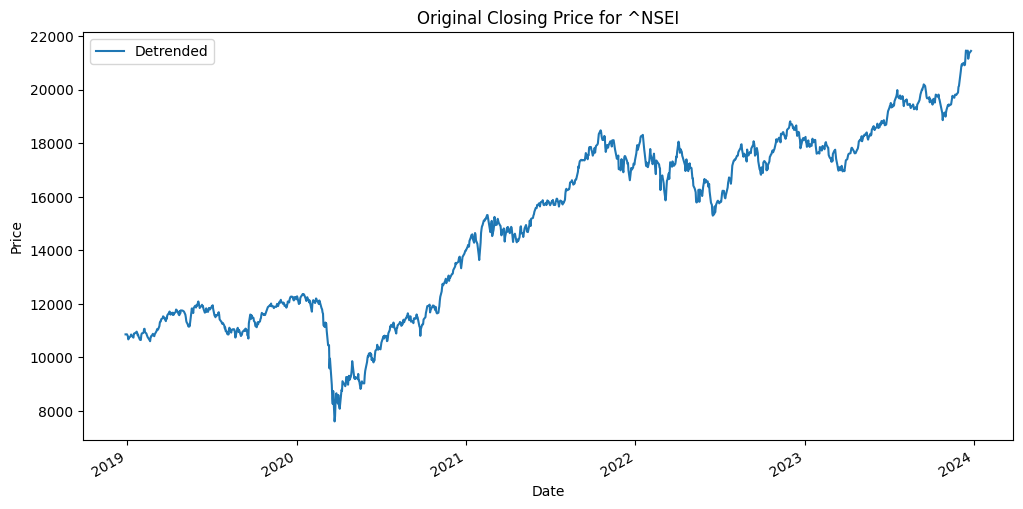

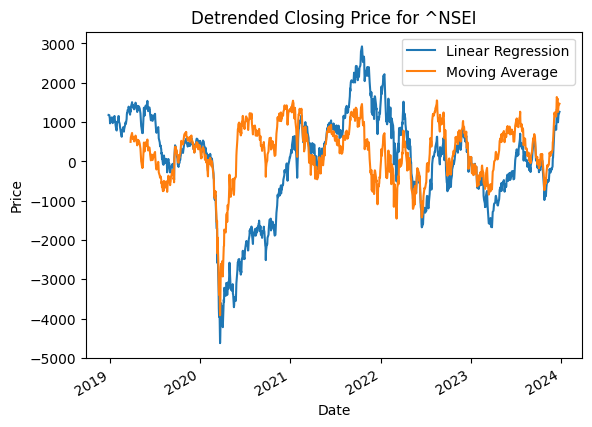

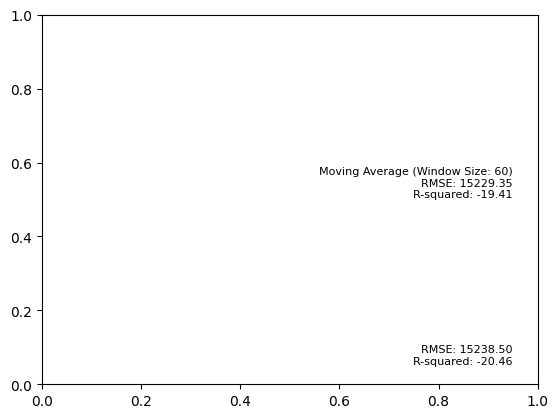

In [ ]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Function to fetch closing data
def fetch_close_data(ticker_symbol: str, start_date: datetime.datetime) -> pd.Series:
    """Fetches the closing price data for a given ticker symbol and start date."""
    ticker_data = yf.Ticker(ticker_symbol)
    ticker_dataframe = ticker_data.history(period='1d', start=start_date, end=datetime.datetime.now())
    return ticker_dataframe['Close']

# Function to check if the latest data is within a given tolerance of days
def check_latest_date(series: pd.Series, tolerance_days: int = 7) -> None:
    """Checks if the latest data is within a given tolerance of days."""
    most_recent_date = series.index.max().date()
    today = datetime.datetime.now().date()
    difference = today - most_recent_date
    if difference.days > tolerance_days:
        raise ValueError(f"Error: The most recent data is {difference.days} days old, beyond the tolerance of {tolerance_days} days.")

# Function to perform Linear Regression Detrend
def linear_regression_detrend(series: pd.Series) -> tuple[pd.Series, pd.Series]:
    """Performs linear regression detrending on a given time series."""
    X = sm.add_constant(np.arange(len(series)))
    model = sm.OLS(series, X).fit()
    trend = model.predict(X)
    return series - trend, trend

# Function to perform Moving Average Detrend
def moving_average_detrend(series: pd.Series, window_size: int = 60) -> tuple[pd.Series, pd.Series]:
    """Performs moving average detrending on a given time series."""
    rolling_mean = series.rolling(window=window_size).mean()
    return series - rolling_mean, rolling_mean

# Function to plot the time series data
def plot_time_series(series: pd.Series, title: str = 'Closing Price', window: str = None, original_close: pd.Series = None) -> None:
    """Plots the time series data."""
    plt.figure(figsize=(12, 6))
    if window:
        series = series.last(window)
    if original_close is not None:
        plt.plot(original_close.index, original_close, label='Original Close', color='black', alpha=0.5)
    series.plot(label='Detrended', title=title)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Function to handle missing values in the DataFrame
def handle_missing_values(df: pd.DataFrame) -> None:
    """Handles missing values in the DataFrame."""
    df.dropna(inplace=True)
    if df.empty:
        raise ValueError("The DataFrame is empty after dropping missing values.")

# Function to calculate start date based on input years
def calculate_start_date(years_back: int) -> datetime.datetime:
    """Calculates the start date based on the input number of years."""
    return datetime.datetime.now() - datetime.timedelta(days=365 * years_back)

# Function to calculate detrending performance metrics
def calculate_detrending_metrics(original: pd.Series, detrended: pd.Series) -> dict:
    """Calculates the detrending performance metrics."""
    rmse = np.sqrt(np.mean((original - detrended) ** 2))
    r_squared = 1 - np.sum((original - detrended) ** 2) / np.sum((original - original.mean()) ** 2)
    return {'RMSE': rmse, 'R-squared': r_squared}

# Function to add performance metrics to the chart
def add_performance_metrics(ax: plt.Axes, metrics: dict) -> None:
    """Adds the performance metrics to the chart."""
    text_str = f"RMSE: {metrics['RMSE']:.2f}\nR-squared: {metrics['R-squared']:.2f}"
    ax.text(0.95, 0.05, text_str, transform=ax.transAxes, fontsize=8, ha='right', va='bottom')

# Create input widgets
ticker_widget = widgets.Text(value='^NSEI', description='Ticker Symbol:')
years_widget = widgets.IntText(value=5, description='Years Back:')

# Display input widgets
display(ticker_widget, years_widget)

# Main script
def main():
    # Get user input
    ticker = ticker_widget.value
    years_back = int(years_widget.value)

    try:
        start_date = calculate_start_date(years_back)
        price = fetch_close_data(ticker, start_date)
        check_latest_date(price)
        print("Data fetched and verified successfully.")
    except ValueError as e:
        print(e)
        return  # Stop execution if there's an error in data fetching

    # Visualize the base data
    plot_time_series(price, title=f'Original Closing Price for {ticker}')

    # Apply detrending functions
    lr_detrended, _ = linear_regression_detrend(price)
    ma_detrended, _ = moving_average_detrend(price)

    # Create a DataFrame to hold the detrended data
    detrended_df = pd.DataFrame({'Linear Regression': lr_detrended, 'Moving Average': ma_detrended})

    # Calculate performance metrics
    lr_metrics = calculate_detrending_metrics(price, lr_detrended)
    ma_metrics = calculate_detrending_metrics(price, ma_detrended)

    # Plot the detrended data
    detrended_df.plot(title='Detrended Closing Price for ' + ticker)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Add performance metrics to the chart
    ax = plt.gca()
    add_performance_metrics(ax, lr_metrics)
    ax.text(0.95, 0.5, f"Moving Average (Window Size: 60)\nRMSE: {ma_metrics['RMSE']:.2f}\nR-squared: {ma_metrics['R-squared']:.2f}", transform=ax.transAxes, fontsize=8, ha='right', va='bottom')
    plt.show()

# Run the main script
main()